In [24]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [5]:
df_ownership = pd.read_excel('Ownership.xlsx')
df_quality = pd.read_excel('Quality_Measures_-_Long_Stay.xlsx')
df_penalties = pd.read_excel('Penalty_Counts.xlsx')

### Ownership Data

We first start with getting an idea of the shape of the SNF Ownership dataset:

In [3]:
df_ownership.info()
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169485 entries, 0 to 169484
Data columns (total 13 columns):
Federal Provider Number                        169485 non-null object
Provider Name                                  169485 non-null object
Provider Address                               169485 non-null object
Provider City                                  169485 non-null object
Provider State                                 169485 non-null object
Provider Zip Code                              169485 non-null int64
Role played by Owner or Manager in Facility    169485 non-null object
Owner Type                                     168698 non-null object
Owner Name                                     168698 non-null object
Ownership Percentage                           168698 non-null object
Association Date                               168698 non-null object
Location                                       169235 non-null object
Processing Date                                169

We observe that the dataset contains 169,485 observations of 13 variables, and that the data all appears to be discrete/categorical. As such, let's explore the dimensions of the object and/or bool values:

In [4]:
df_ownership.describe(include=['object', 'bool'])

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Role played by Owner or Manager in Facility,Owner Type,Owner Name,Ownership Percentage,Association Date,Location
count,169485,169485,169485,169485,169485,169485,168698,168698,168698,168698,169235
unique,15538,15270,15510,5290,53,10,2,48815,98,7829,15496
top,505498,MILLER'S MERRY MANOR,2929 SOUTH WATERFORD DRIVE,HOUSTON,CA,DIRECTOR,Individual,"BERG, MICHAEL",NOT APPLICABLE,since 12/01/2012,"2929 SOUTH WATERFORD DRIVE SPOKANE, WA 99203 (..."
freq,95,194,95,824,12911,38239,125027,738,116002,3226,95


We confirm that the dataset contains all ~15,000 of known SNF facilities that accept Medicare as payment, in 5,290 cities, and 53 states/territories. It appears that owners/managers are categorized as playing one of 10 different roles, that there are two types of owners, and that there are 48,815 unique owners of the ~15,000 facilities. 

Let's break this down further:

In [5]:
print("Value counts of Owner Type: ")
print(df_ownership['Owner Type'].value_counts())
print("\n")
print("Value counts of Owner Role: ")
print(df_ownership['Role played by Owner or Manager in Facility'].value_counts())
print("\n")

Value counts of Owner Type: 
Individual      125027
Organization     43671
Name: Owner Type, dtype: int64


Value counts of Owner Role: 
DIRECTOR                                     38239
OFFICER                                      31418
5% OR GREATER INDIRECT OWNERSHIP INTEREST    29543
5% OR GREATER DIRECT OWNERSHIP INTEREST      23153
MANAGING EMPLOYEE                            21512
OPERATIONAL/MANAGERIAL CONTROL               21170
PARTNERSHIP INTEREST                          1978
5% OR GREATER SECURITY INTEREST               1060
Ownership Data Not Available                   787
5% OR GREATER MORTGAGE INTEREST                625
Name: Role played by Owner or Manager in Facility, dtype: int64




We observe that most owner type observations are classified as Individual, and that there is diveristy in terms of how the owner roles are categorized. It seems that the roles which most owners play are Director and/or Officer, and that they hold 5% or greater direct and/or indirect ownership interest in the facility.

Let's plot the data to see what it looks like in a different format:

In [6]:
print("Bar Chart of Owner Type: ")
df_ownership['Owner Type'].value_counts().plot(kind='bar')

Bar Chart of Owner Type: 


Bar Chart of Owner Role: 


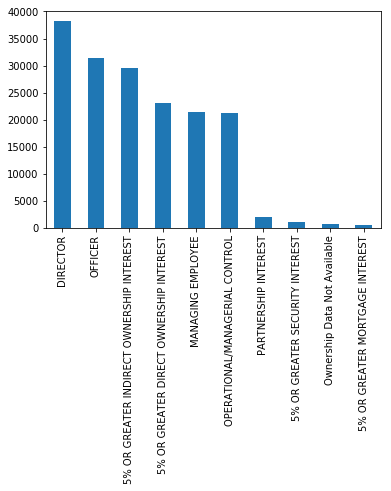

In [7]:
print("Bar Chart of Owner Role: ")
df_ownership['Role played by Owner or Manager in Facility'].value_counts().plot(kind='bar')

### Quality Data

Now we will explore the dataset containing observations of quality of life in long-term residents of the ~15,000 SNFs.

We start in the same manner, by calling info():

In [8]:
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201851 entries, 0 to 201850
Data columns (total 7 columns):
Federal Provider Number       201851 non-null object
Provider Name                 201851 non-null object
Provider State                201851 non-null object
Measure Description           201851 non-null object
Four Quarter Average Score    194280 non-null float64
Location                      201539 non-null object
Processing Date               201851 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.8+ MB


We see that we have a mixture of object, float, and datetime data. Our object data and our float data are the most important, and our four-quarter measurement of quality of life metrics is the key variable; it is a percentage. Let's call describe() and see what it tells us:

In [9]:
df_quality.describe()

,Four Quarter Average Score
count,194280.000000
mean,18.103302
std,26.422241
min,0.000000
25%,1.834861
50%,7.246379
75%,20.231360
max,100.000000


This is a little opaque because we don't yet have a full understanding of what the data actually contians. Let's call the objects to see what they tell us:

In [10]:
df_quality.describe(include=['object', 'bool'])

,Federal Provider Number,Provider Name,Provider State,Measure Description,Location
count,201851,201851,201851,201851,201539
unique,15527,15257,53,13,15485
top,165185,MILLER'S MERRY MANOR,TX,Percent catheter inserted and left,"N2665 CTY RD KING, WI 54946 (44.335821, -88.45..."
freq,13,377,15925,15527,52


Here we see that the Measure Description is the variable associated with each measurement in our four quarter average metrics. There are 13 different measurements all reporting a different average score. Let's find out what the 13 different measuements are and what their average scores might be:

In [11]:
quality_measures = df_quality['Four Quarter Average Score'].groupby(df_quality['Measure Description'])

In [12]:
quality_measures.mean()

Measure Description
Percent catheter inserted and left          2.159872
Percent given pneumococcal vaccine         93.702966
Percent increased help daily activities    14.824133
Percent lost too much weight                5.629126
Percent low-risk residents incontinence    48.428398
Percent physically restrained               0.301692
Percent received antianxiety meds          20.717118
Percent received antipsychotic meds        14.622558
Percent reported depressive symptoms        4.557409
Percent reported severe pain                6.868326
Percent who fell and seriously injured      3.385433
Percent with UTI                            2.832252
Percent worsened independent mobility      17.946425
Name: Four Quarter Average Score, dtype: float64

We can clearly see that these 13 different metrics to be measured to generate a four quarter average can all impact the quality of a nursing home long-term resident's quality of life. We can see that nearly all residents received a phneumococcal vaccine, that the vast majority were never physically restrained, and that just about half of residents classified as low risk experience incontinence, and other measurements as is clear.

We can graph these metrics on a histogram to get a visual representation:

Measure Description
Percent catheter inserted and left         AxesSubplot(0.125,0.125;0.775x0.755)
Percent given pneumococcal vaccine         AxesSubplot(0.125,0.125;0.775x0.755)
Percent increased help daily activities    AxesSubplot(0.125,0.125;0.775x0.755)
Percent lost too much weight               AxesSubplot(0.125,0.125;0.775x0.755)
Percent low-risk residents incontinence    AxesSubplot(0.125,0.125;0.775x0.755)
Percent physically restrained              AxesSubplot(0.125,0.125;0.775x0.755)
Percent received antianxiety meds          AxesSubplot(0.125,0.125;0.775x0.755)
Percent received antipsychotic meds        AxesSubplot(0.125,0.125;0.775x0.755)
Percent reported depressive symptoms       AxesSubplot(0.125,0.125;0.775x0.755)
Percent reported severe pain               AxesSubplot(0.125,0.125;0.775x0.755)
Percent who fell and seriously injured     AxesSubplot(0.125,0.125;0.775x0.755)
Percent with UTI                           AxesSubplot(0.125,0.125;0.775x0.755)
Percent worsened ind

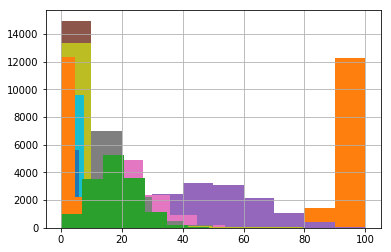

In [13]:
quality_measures.hist()

Our histogram demonstrates that all of our measurements fall within ranges, some of which most residents report and experience, and others which only a minority of residents report or experience. This histogram is a little disappointing because it's too busy and will need some tweaking in future versions such that the data is more clearly read; for our purposes here, it sufficies to conclude that there is greater or lesser variability within each measurement.

### Penalties Data

We follow a similar path with our dataset on penalties and fines issued to SNFs by CMS:

In [14]:
df_penalties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15527 entries, 0 to 15526
Data columns (total 10 columns):
ID                                  15527 non-null int64
Federal Provider Number             15527 non-null object
Provider Name                       15527 non-null object
Provider State                      15527 non-null object
Number of Fines                     15527 non-null int64
Total Amount of Fines in Dollars    15527 non-null int64
Number of Payment Denials           15527 non-null int64
Total Number of Penalties           15527 non-null int64
Location                            15503 non-null object
Processing Date                     15527 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 1.2+ MB


We see that we have a mixture of objects and integers, as well as a datetime object which is not importnat to us. Let's look further:

In [15]:
df_penalties.describe()

,ID,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
count,15527.00000,15527.000000,1.552700e+04,15527.000000,15527.000000
mean,17763.00000,0.476782,1.615254e+04,0.103111,0.579893
std,4482.40315,0.827416,5.638674e+04,0.357824,1.008997
min,10000.00000,0.000000,0.000000e+00,0.000000,0.000000
25%,13881.50000,0.000000,0.000000e+00,0.000000,0.000000
50%,17763.00000,0.000000,0.000000e+00,0.000000,0.000000
75%,21644.50000,1.000000,8.125000e+03,0.000000,1.000000
max,25526.00000,7.000000,1.508727e+06,4.000000,9.000000


It appears that the highest number of fines that a SNF recieved was 7, that the highest number of payment denials was 4, and that the highest total number of penalties was 9. The highest fines numbered in the millions. There were 15,527 total fines issued. Our data tells us that there are SNFs that did not receive any fines or penalties.

Let's look at our objects and bools for further context:

In [16]:
df_penalties.describe(include=['object', 'bool'])

,Federal Provider Number,Provider Name,Provider State,Location
count,15527,15527,15527,15503
unique,15527,15257,53,15485
top,675622,MILLER'S MERRY MANOR,TX,"N2665 CTY RD KING, WI 54946 (44.335821, -88.45..."
freq,1,29,1225,4


Nothing much to see here other than to confirm that the dataset contains all previously explored SNFs. Let's look at the value counts to break down the proportions of each:

In [17]:
print("Value counts of total number of penalties: ")
print(df_penalties['Total Number of Penalties'].value_counts(normalize=True))
print("\n")
print("Value counts of number of payment denials: ")
print(df_penalties['Number of Payment Denials'].value_counts(normalize=True))
print("\n")
print("Value counts of number of fines: ")
print(df_penalties['Number of Fines'].value_counts(normalize=True))

Value counts of total number of penalties: 
0    0.653636
1    0.206479
2    0.083596
3    0.033941
4    0.012623
5    0.006247
6    0.002190
7    0.000837
8    0.000386
9    0.000064
Name: Total Number of Penalties, dtype: float64


Value counts of number of payment denials: 
0    0.912346
1    0.074451
2    0.011013
3    0.002125
4    0.000064
Name: Number of Payment Denials, dtype: float64


Value counts of number of fines: 
0    0.673279
1    0.223160
2    0.071939
3    0.021447
4    0.006698
5    0.002447
6    0.000837
7    0.000193
Name: Number of Fines, dtype: float64


Here we can see that 65% of SNFs received 0 penalties, that 91% of SNFs received 0 payment denials, and thta 67% of SNFs received 0 fines. Amonth those that did receive any penalties, most incurred just one, with increasingly lower frequency of fines up to the maximum quantity reported. 

Maybe we can see whether total fine amounts go up with number of fines. This is one very rough way to do it:

In [18]:
df_penalties[df_penalties['Number of Fines'] == 0].mean()

ID                                  17659.171800
Number of Fines                         0.000000
Total Amount of Fines in Dollars        0.000000
Number of Payment Denials               0.031184
Total Number of Penalties               0.031184
dtype: float64

In [19]:
df_penalties[df_penalties['Number of Fines'] == 1].mean()

ID                                   17956.973160
Federal Provider Number             295861.417027
Number of Fines                          1.000000
Total Amount of Fines in Dollars     32653.393939
Number of Payment Denials                0.174603
Total Number of Penalties                1.174603
dtype: float64

In [20]:
df_penalties[df_penalties['Number of Fines'] == 2].mean()

ID                                   18120.471799
Federal Provider Number             289956.396598
Number of Fines                          2.000000
Total Amount of Fines in Dollars     71791.217547
Number of Payment Denials                0.369740
Total Number of Penalties                2.369740
dtype: float64

In [21]:
df_penalties[df_penalties['Number of Fines'] == 3].mean()

ID                                   17891.003003
Federal Provider Number             298886.873874
Number of Fines                          3.000000
Total Amount of Fines in Dollars    104279.012012
Number of Payment Denials                0.453453
Total Number of Penalties                3.453453
dtype: float64

In [22]:
df_penalties[df_penalties['Number of Fines'] == 4].mean()

ID                                   17791.644231
Federal Provider Number             295463.682692
Number of Fines                          4.000000
Total Amount of Fines in Dollars    125701.644231
Number of Payment Denials                0.663462
Total Number of Penalties                4.663462
dtype: float64

In [23]:
df_penalties[df_penalties['Number of Fines'] == 5].mean()

ID                                   17164.578947
Federal Provider Number             332181.263158
Number of Fines                          5.000000
Total Amount of Fines in Dollars    161992.500000
Number of Payment Denials                0.657895
Total Number of Penalties                5.657895
dtype: float64

In [24]:
df_penalties[df_penalties['Number of Fines'] == 6].mean()

ID                                   17776.923077
Federal Provider Number             303834.307692
Number of Fines                          6.000000
Total Amount of Fines in Dollars    219237.538462
Number of Payment Denials                0.846154
Total Number of Penalties                6.846154
dtype: float64

In [25]:
df_penalties[df_penalties['Number of Fines'] == 7].mean()

ID                                   14750.333333
Federal Provider Number             415199.666667
Number of Fines                          7.000000
Total Amount of Fines in Dollars    220648.333333
Number of Payment Denials                0.333333
Total Number of Penalties                7.333333
dtype: float64

Indeed, the more fines that a SNF receives, the more in total fines they paid in 2018.

We can explore all of these continous variables in a visualization called a scatter matrix. We isolate the continuous values and then build our plot; we also change the columns names for readability on our plot:

In [26]:
penalties_scatter = df_penalties[['Total Number of Penalties', 'Number of Payment Denials',
                                'Number of Fines', 'Total Amount of Fines in Dollars']]

In [27]:
penalties_scatter = penalties_scatter.rename(columns={
    'Total Number of Penalties': 'Num Penalties',
    'Number of Payment Denials': 'Num Denied Pay',
    'Number of Fines': 'Num Fines',
    'Total Amount of Fines in Dollars': '$'
})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001129BB38>,
      dtype=object)

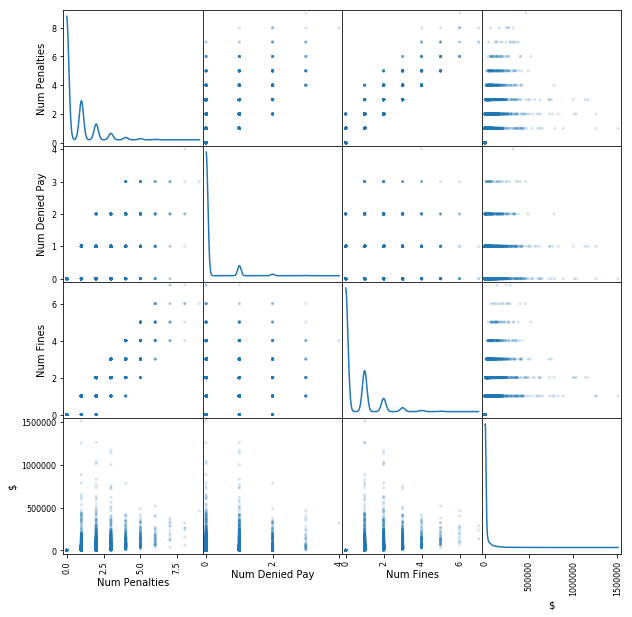

In [28]:
scatter_matrix(penalties_scatter, alpha=0.2, figsize=(10, 10), diagonal='kde')

This graph gives us a starting point to explore further. We can clearly see that some of the variables are more closely correlated than others, and that some have no correlation at all.

In [29]:
# doing some graph analysis now
# https://towardsdatascience.com/getting-started-with-graph-analysis-in-python-with-pandas-and-networkx-5e2d2f82f18e

In [30]:
# looking at my objects

df_ownership.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Role played by Owner or Manager in Facility,Owner Type,Owner Name,Ownership Percentage,Association Date,Location,Processing Date
0,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,since 07/01/2002,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-05-01
1,245341,CENTRACARE HEALTH SYSTEM-SAUK CENTRE NURSING HOME,425 N ELM STREET,SAUK CENTRE,MN,56378,OFFICER,Individual,"CHRISTIANSON, DELANO",NOT APPLICABLE,since 12/01/2012,"425 N ELM STREET SAUK CENTRE, MN 56378 (45.745...",2019-05-01
2,245310,BENEDICTINE HEALTH CENTER INNSBRUCK,1101 BLACK OAK DRIVE,NEW BRIGHTON,MN,55112,OFFICER,Individual,"BERGIEN, TRICIA",NOT APPLICABLE,since 11/16/2016,"1101 BLACK OAK DRIVE NEW BRIGHTON, MN 55112 (4...",2019-05-01
3,245295,THE EMERALDS AT ST PAUL LLC,420 MARSHALL AVENUE,SAINT PAUL,MN,55102,OPERATIONAL/MANAGERIAL CONTROL,Individual,"CONTRIS, PAUL",NOT APPLICABLE,since 06/01/1999,"420 MARSHALL AVENUE SAINT PAUL, MN 55102 (44.9...",2019-05-01
4,245318,GOOD SAMARITAN SOCIETY - INTERNATIONAL FALLS,2201 KEENAN DRIVE,INTERNATIONAL FALLS,MN,56649,DIRECTOR,Individual,"ROBINSON, DINA",NOT APPLICABLE,since 06/28/2016,"2201 KEENAN DRIVE INTERNATIONAL FALLS, MN 5664...",2019-05-01


In [31]:
df_quality.head()

,Federal Provider Number,Provider Name,Provider State,Measure Description,Four Quarter Average Score,Location,Processing Date
0,125063,15 CRAIGSIDE,HI,Percent catheter inserted and left,0.913644,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",2019-06-01
1,125063,15 CRAIGSIDE,HI,Percent reported depressive symptoms,5.479451,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",2019-06-01
2,125063,15 CRAIGSIDE,HI,Percent given pneumococcal vaccine,100.000000,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",2019-06-01
3,125063,15 CRAIGSIDE,HI,Percent who fell and seriously injured,4.026847,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",2019-06-01
4,125063,15 CRAIGSIDE,HI,Percent lost too much weight,2.985073,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",2019-06-01


In [32]:
df_penalties.head()

,ID,Federal Provider Number,Provider Name,Provider State,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,10000,53A051,SOUTH LINCOLN NURSING CENTER,WY,0,0,0,0,"711 ONYX STREET KEMMERER, WY 83101 (41.78958, ...",2019-06-01
1,10001,53A050,STAR VALLEY CARE CENTER,WY,0,0,0,0,"110 HOSPITAL LANE AFTON, WY 83110 (42.716162, ...",2019-06-01
2,10002,53A002,AMIE HOLT CARE CENTER,WY,0,0,0,0,"497 W LOTT BUFFALO, WY 82834 (44.349788, -106....",2019-06-01
3,10003,52A461,CLEARVIEW BRAIN INJURY CENTER,WI,0,0,0,0,"198 COUNTY JUNEAU, WI 53039",2019-06-01
4,10004,52A431,ST ANN REST HOME,WI,0,0,0,0,"2020 S MUSKEGO AVE MILWAUKEE, WI 53204 (43.007...",2019-06-01


In [33]:
# let's try to connect SNFs, represented by their Federal Provider Number,
# that have the same number of fines and reside in the same state. Just an
# exercise.

In [34]:
column_edge = 'Number of Fines'
column_ID = 'Federal Provider Number'

In [35]:
# select columns, remove NaN
data_to_merge = df_penalties[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates()

In [36]:
# To create connections between SNFs who have the same number of fines,
# join data with itself on the 'Federal Provider Number' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

In [37]:
data_to_merge

,Federal Provider Number,Number of Fines,Federal Provider Number_2
0,53A051,0,53A051
1,53A051,0,53A050
2,53A051,0,53A002
3,53A051,0,52A461
4,53A051,0,52A431
5,53A051,0,52A429
6,53A051,0,52A407
7,53A051,0,52A251
8,53A051,0,51A013
9,53A051,0,51A010


In [38]:
# By joining the data with itself, SNFs will have a connection with themselves, as you can see above.
# Remove self connections, to keep only connected SNFs who are different.
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]
    
# To avoid counting twice the connections (SNF1 connected to SNF2 and SNF2 connected to SNF1),
# we force the first ID to be "lower" then ID_2
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

TypeError: '<' not supported between instances of 'int' and 'str'

In [39]:
# Ok, we got an error. Let's look at our object types in penalties
df_penalties.dtypes

ID                                           int64
Federal Provider Number                     object
Provider Name                               object
Provider State                              object
Number of Fines                              int64
Total Amount of Fines in Dollars             int64
Number of Payment Denials                    int64
Total Number of Penalties                    int64
Location                                    object
Processing Date                     datetime64[ns]
dtype: object

In [40]:
# Maybe we can change FPN to int
df_penalties['Federal Provider Number'] = pd.to_numeric(df_penalties['Federal Provider Number'])

ValueError: Unable to parse string "53A051" at position 0

In [41]:
# Ok, so that didn't work. 
# Opening the workbook in Excel and seeing if we can just change it to a number there...

# Did that, reloading the dataframe...

In [42]:
# So, I discovered that the Federal Provider Numbers are not all numbers, some have letters and
# other characters in them, so they need to be treated like strings. But, the artihmetic in the
# tutorial seems to involve only integers.

# I ran the code in the tutorial and found that Phone Number was an object, so what if we just
# flipped the logic?

In [43]:
column_edge = 'Federal Provider Number'
column_ID = 'Number of Fines'

In [44]:
# select columns, remove NaN
data_to_merge = df_penalties[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates()

In [45]:
# To create connections between SNFs who have the same number of fines,
# join data with itself on the 'Federal Provider Number' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

In [46]:
data_to_merge

,Number of Fines,Federal Provider Number,Number of Fines_2
0,0,53A051,0
1,0,53A050,0
2,0,53A002,0
3,0,52A461,0
4,0,52A431,0
5,0,52A429,0
6,0,52A407,0
7,0,52A251,0
8,0,51A013,0
9,0,51A010,0


In [47]:
# ... but that doesn't work because we need FPN to be the unique identifier.
# Maybe one way around this for now is to introduce a secondary unique ID, just for this purpose.
# Going into Excel to make it...

In [48]:
df_penalties = pd.read_excel('Penalty_Counts.xlsx')

In [49]:
df_penalties.dtypes

ID                                           int64
Federal Provider Number                     object
Provider Name                               object
Provider State                              object
Number of Fines                              int64
Total Amount of Fines in Dollars             int64
Number of Payment Denials                    int64
Total Number of Penalties                    int64
Location                                    object
Processing Date                     datetime64[ns]
dtype: object

In [50]:
df = df_penalties.sample(frac=0.3, random_state=99)

In [51]:
df

,ID,Federal Provider Number,Provider Name,Provider State,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
2280,12280,515105,ROSEWOOD CENTER,WV,0,0,0,0,"8 ROSE STREET GRAFTON, WV 26354 (39.337174, -8...",2019-06-01
12045,22045,146046,BURNSIDES COMMUNITY HEALTH CTR,IL,0,0,0,0,"410 NORTH SECOND STREET MARSHALL, IL 62441 (39...",2019-06-01
13051,23051,115283,MANOR CARE REHABILITATION CENTER - MARIETTA,GA,0,0,0,0,"4360 JOHNSON FERRY PLACE MARIETTA, GA 30068 (3...",2019-06-01
11309,21309,165206,MORNINGSIDE CARE CENTER,IA,0,0,1,1,"600 MORNINGSIDE STREET IDA GROVE, IA 51445 (42...",2019-06-01
10219,20219,195494,LANDMARK OF BATON ROUGE,LA,2,12196,0,2,"9105 OXFORD PLACE DRIVE BATON ROUGE, LA 70809 ...",2019-06-01
10205,20205,195510,"RUSTON NURSING AND REHABILITATION CENTER,LLC",LA,0,0,0,0,"3720 HWY RUSTON, LA 71270",2019-06-01
808,10808,675920,SNYDER HEALTHCARE CENTER,TX,0,0,0,0,"5311 BIG SPRING HWY SNYDER, TX 79549 (32.68874...",2019-06-01
1545,11545,555499,REDWOOD HEALTHCARE CENTER LLC,CA,0,0,0,0,"3145 HIGH STREET OAKLAND, CA 94619 (37.785178,...",2019-06-01
4946,14946,375151,CAPITOL HILL SKILLED NURSING AND THERAPY,OK,0,0,0,0,"2400 SOUTHWEST 55TH STREET OKLAHOMA CITY, OK 7...",2019-06-01
15335,25335,15424,ROANOKE REHABILITATION & HEALTHCARE CENTER,AL,0,0,0,0,"680 SEYMOUR DRIVE ROANOKE, AL 36274 (33.141878...",2019-06-01


In [52]:
column_edge = 'Number of Fines'
column_ID = 'ID'

In [53]:
# select columns, remove NaN
data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates()

In [54]:
# To create connections between SNFs who have the same number of fines,
# join data with itself on the 'Federal Provider Number' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

In [55]:
data_to_merge

,ID,Number of Fines,ID_2
0,12280,0,12280
1,12280,0,22045
2,12280,0,23051
3,12280,0,21309
4,12280,0,20205
5,12280,0,10808
6,12280,0,11545
7,12280,0,14946
8,12280,0,25335
9,12280,0,13739


In [56]:
# By joining the data with itself, SNFs will have a connection with themselves, as you can see above.
# Remove self connections, to keep only connected SNFs who are different.
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]
    
# To avoid counting twice the connections (SNF1 connected to SNF2 and SNF2 connected to SNF1),
# we force the first ID to be "lower" then ID_2
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [57]:
d

,ID,ID_2,Number of Fines
1,12280,22045,0
2,12280,23051,0
3,12280,21309,0
4,12280,20205,0
7,12280,14946,0
8,12280,25335,0
9,12280,13739,0
10,12280,13731,0
11,12280,25272,0
12,12280,15553,0


In [58]:
# graph creation
import networkx as nx

G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)

G.add_nodes_from(nodes_for_adding=df.ID.tolist())

In [59]:
G.nodes()

NodeView((12280, 22045, 23051, 21309, 20205, 14946, 25335, 13739, 13731, 25272, 15553, 23228, 17059, 14933, 24129, 25495, 24297, 15190, 12718, 16201, 25150, 13664, 12610, 21083, 20303, 13701, 20012, 16676, 18321, 21408, 23603, 23430, 22797, 17721, 20682, 21237, 15573, 21670, 25433, 21390, 21636, 17529, 20621, 16860, 25526, 24296, 15461, 18169, 15786, 18397, 14944, 22655, 17533, 16996, 14368, 18433, 18820, 20836, 20608, 16534, 12954, 24262, 12680, 18132, 16361, 20784, 19956, 20497, 15274, 23539, 18113, 17320, 20421, 25198, 12763, 20474, 13538, 25387, 23929, 23274, 21464, 24692, 14540, 14504, 13238, 19518, 12624, 22618, 20014, 13376, 15001, 12616, 19986, 23583, 25245, 20033, 24098, 22026, 22636, 13407, 14204, 18218, 23836, 23062, 18516, 18047, 23074, 15525, 17951, 17343, 17564, 17730, 20057, 23317, 18249, 24538, 13305, 25379, 18593, 18103, 18158, 16725, 19623, 22210, 18653, 12847, 15617, 23550, 24885, 23037, 14757, 18868, 12648, 16639, 22378, 23832, 14029, 19104, 20656, 18553, 16933, 185

In [60]:
# now, let's do states

column_edge = 'Provider State'
column_ID = 'ID'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates()

data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]

d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [61]:
d

,ID,ID_2,Provider State
2,12280,12315,WV
3,12280,12281,WV
4,12280,12287,WV
8,12280,12309,WV
12,12280,12326,WV
13,12280,12327,WV
14,12280,12321,WV
16,12280,12293,WV
18,12280,12285,WV
20,12280,12313,WV


In [62]:
# Create the connections in the graph
links_attributes = {tuple(row[[column_ID, column_ID+"_2"]]): {column_edge: row[column_edge]} for i,row in d.iterrows()}

# create the connection, without attribute. Check it with G.get_edge_data(3,5)
G.add_edges_from(links_attributes) 

# adds the attribute. Check it with G.get_edge_data(3,5)
nx.set_edge_attributes(G=G, values=links_attributes) 

In [63]:
# drawing graphs...

%matplotlib inline

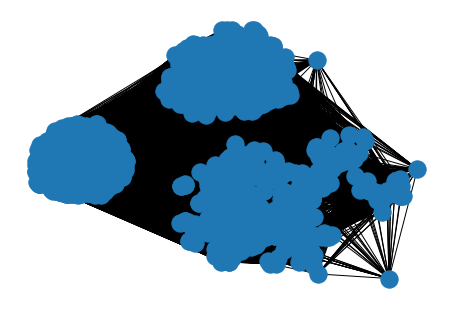

In [64]:
nx.draw(G)

In [65]:
# alright, let's join some dataframes for a unique DSC 550 project
# https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

In [66]:
# we've got three. They all have a different number of observations, but the Federal Provider
# Number links the observations in all three. dataframes.

In [3]:
# let's see what happens if we try simple concatenation...

df_row = pd.concat([df_ownership, df_quality, df_penalties])

C:\Users\tdrace\AppData\Local\Continuum\anaconda3\envs\main1\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
df_row

,Association Date,Federal Provider Number,Four Quarter Average Score,ID,Location,Measure Description,Number of Fines,Number of Payment Denials,Owner Name,Owner Type,Ownership Percentage,Processing Date,Provider Address,Provider City,Provider Name,Provider State,Provider Zip Code,Role played by Owner or Manager in Facility,Total Amount of Fines in Dollars,Total Number of Penalties
0,since 07/01/2002,245277,NaN,NaN,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",NaN,NaN,NaN,BENEDICTINE HEALTH SYSTEM,Organization,1,2019-05-01,601 GRANT AVENUE,EVELETH,ST RAPHAELS HEALTH & REHAB CENTER,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,NaN,NaN
1,since 12/01/2012,245341,NaN,NaN,"425 N ELM STREET SAUK CENTRE, MN 56378 (45.745...",NaN,NaN,NaN,"CHRISTIANSON, DELANO",Individual,NOT APPLICABLE,2019-05-01,425 N ELM STREET,SAUK CENTRE,CENTRACARE HEALTH SYSTEM-SAUK CENTRE NURSING HOME,MN,56378.0,OFFICER,NaN,NaN
2,since 11/16/2016,245310,NaN,NaN,"1101 BLACK OAK DRIVE NEW BRIGHTON, MN 55112 (4...",NaN,NaN,NaN,"BERGIEN, TRICIA",Individual,NOT APPLICABLE,2019-05-01,1101 BLACK OAK DRIVE,NEW BRIGHTON,BENEDICTINE HEALTH CENTER INNSBRUCK,MN,55112.0,OFFICER,NaN,NaN
3,since 06/01/1999,245295,NaN,NaN,"420 MARSHALL AVENUE SAINT PAUL, MN 55102 (44.9...",NaN,NaN,NaN,"CONTRIS, PAUL",Individual,NOT APPLICABLE,2019-05-01,420 MARSHALL AVENUE,SAINT PAUL,THE EMERALDS AT ST PAUL LLC,MN,55102.0,OPERATIONAL/MANAGERIAL CONTROL,NaN,NaN
4,since 06/28/2016,245318,NaN,NaN,"2201 KEENAN DRIVE INTERNATIONAL FALLS, MN 5664...",NaN,NaN,NaN,"ROBINSON, DINA",Individual,NOT APPLICABLE,2019-05-01,2201 KEENAN DRIVE,INTERNATIONAL FALLS,GOOD SAMARITAN SOCIETY - INTERNATIONAL FALLS,MN,56649.0,DIRECTOR,NaN,NaN
5,since 04/24/2013,245280,NaN,NaN,"610 SUMMIT DRIVE FAIRMONT, MN 56031 (43.64388,...",NaN,NaN,NaN,"HAWKINS, TOM",Individual,NOT APPLICABLE,2019-05-01,610 SUMMIT DRIVE,FAIRMONT,LAKEVIEW METHODIST HEALTH CARE CENTER,MN,56031.0,DIRECTOR,NaN,NaN
6,since 06/25/2013,245279,NaN,NaN,"3815 WEST BROADWAY ROBBINSDALE, MN 55422 (45.0...",NaN,NaN,NaN,"RACEK, JOHN",Individual,NOT APPLICABLE,2019-05-01,3815 WEST BROADWAY,ROBBINSDALE,GOOD SAMARITAN SOCIETY - SPECIALTY CARE COMMUNITY,MN,55422.0,DIRECTOR,NaN,NaN
7,since 06/09/2009,245286,NaN,NaN,"119 FAUST STREET SOUTHEAST PIERZ, MN 56364 (45...",NaN,NaN,NaN,"ROCHELEAU, KIMBERLY",Individual,NOT APPLICABLE,2019-05-01,119 FAUST STREET SOUTHEAST,PIERZ,PIERZ VILLA INC,MN,56364.0,MANAGING EMPLOYEE,NaN,NaN
8,since 02/01/2017,245273,NaN,NaN,"900 3RD STREET SOUTH FRANKLIN, MN 55333 (44.52...",NaN,NaN,NaN,SUPERIOR LAKE HOLDINGS LLC,Organization,1,2019-05-01,900 3RD STREET SOUTH,FRANKLIN,FRANKLIN REHABILITATION & HEALTHCARE CENTER,MN,55333.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,NaN,NaN
9,since 01/01/2008,245266,NaN,NaN,"618 EAST 17TH STREET MINNEAPOLIS, MN 55404 (44...",NaN,NaN,NaN,"RYMANOWSKI, KEVIN",Individual,NOT APPLICABLE,2019-05-01,618 EAST 17TH STREET,MINNEAPOLIS,BENEDICTINE HEALTH CENTER OF MINNEAPOLIS,MN,55404.0,DIRECTOR,NaN,NaN


In [69]:
# Ok, so you can do it, but it's a little messed up.
# what does this do?

In [4]:
df_row_reindex = pd.concat([df_ownership, df_quality, df_penalties], ignore_index=True)

C:\Users\tdrace\AppData\Local\Continuum\anaconda3\envs\main1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [71]:
df_row_reindex

,Association Date,Federal Provider Number,Four Quarter Average Score,ID,Location,Measure Description,Number of Fines,Number of Payment Denials,Owner Name,Owner Type,Ownership Percentage,Processing Date,Provider Address,Provider City,Provider Name,Provider State,Provider Zip Code,Role played by Owner or Manager in Facility,Total Amount of Fines in Dollars,Total Number of Penalties
0,since 07/01/2002,245277,NaN,NaN,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",NaN,NaN,NaN,BENEDICTINE HEALTH SYSTEM,Organization,1,2019-05-01,601 GRANT AVENUE,EVELETH,ST RAPHAELS HEALTH & REHAB CENTER,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,NaN,NaN
1,since 12/01/2012,245341,NaN,NaN,"425 N ELM STREET SAUK CENTRE, MN 56378 (45.745...",NaN,NaN,NaN,"CHRISTIANSON, DELANO",Individual,NOT APPLICABLE,2019-05-01,425 N ELM STREET,SAUK CENTRE,CENTRACARE HEALTH SYSTEM-SAUK CENTRE NURSING HOME,MN,56378.0,OFFICER,NaN,NaN
2,since 11/16/2016,245310,NaN,NaN,"1101 BLACK OAK DRIVE NEW BRIGHTON, MN 55112 (4...",NaN,NaN,NaN,"BERGIEN, TRICIA",Individual,NOT APPLICABLE,2019-05-01,1101 BLACK OAK DRIVE,NEW BRIGHTON,BENEDICTINE HEALTH CENTER INNSBRUCK,MN,55112.0,OFFICER,NaN,NaN
3,since 06/01/1999,245295,NaN,NaN,"420 MARSHALL AVENUE SAINT PAUL, MN 55102 (44.9...",NaN,NaN,NaN,"CONTRIS, PAUL",Individual,NOT APPLICABLE,2019-05-01,420 MARSHALL AVENUE,SAINT PAUL,THE EMERALDS AT ST PAUL LLC,MN,55102.0,OPERATIONAL/MANAGERIAL CONTROL,NaN,NaN
4,since 06/28/2016,245318,NaN,NaN,"2201 KEENAN DRIVE INTERNATIONAL FALLS, MN 5664...",NaN,NaN,NaN,"ROBINSON, DINA",Individual,NOT APPLICABLE,2019-05-01,2201 KEENAN DRIVE,INTERNATIONAL FALLS,GOOD SAMARITAN SOCIETY - INTERNATIONAL FALLS,MN,56649.0,DIRECTOR,NaN,NaN
5,since 04/24/2013,245280,NaN,NaN,"610 SUMMIT DRIVE FAIRMONT, MN 56031 (43.64388,...",NaN,NaN,NaN,"HAWKINS, TOM",Individual,NOT APPLICABLE,2019-05-01,610 SUMMIT DRIVE,FAIRMONT,LAKEVIEW METHODIST HEALTH CARE CENTER,MN,56031.0,DIRECTOR,NaN,NaN
6,since 06/25/2013,245279,NaN,NaN,"3815 WEST BROADWAY ROBBINSDALE, MN 55422 (45.0...",NaN,NaN,NaN,"RACEK, JOHN",Individual,NOT APPLICABLE,2019-05-01,3815 WEST BROADWAY,ROBBINSDALE,GOOD SAMARITAN SOCIETY - SPECIALTY CARE COMMUNITY,MN,55422.0,DIRECTOR,NaN,NaN
7,since 06/09/2009,245286,NaN,NaN,"119 FAUST STREET SOUTHEAST PIERZ, MN 56364 (45...",NaN,NaN,NaN,"ROCHELEAU, KIMBERLY",Individual,NOT APPLICABLE,2019-05-01,119 FAUST STREET SOUTHEAST,PIERZ,PIERZ VILLA INC,MN,56364.0,MANAGING EMPLOYEE,NaN,NaN
8,since 02/01/2017,245273,NaN,NaN,"900 3RD STREET SOUTH FRANKLIN, MN 55333 (44.52...",NaN,NaN,NaN,SUPERIOR LAKE HOLDINGS LLC,Organization,1,2019-05-01,900 3RD STREET SOUTH,FRANKLIN,FRANKLIN REHABILITATION & HEALTHCARE CENTER,MN,55333.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,NaN,NaN
9,since 01/01/2008,245266,NaN,NaN,"618 EAST 17TH STREET MINNEAPOLIS, MN 55404 (44...",NaN,NaN,NaN,"RYMANOWSKI, KEVIN",Individual,NOT APPLICABLE,2019-05-01,618 EAST 17TH STREET,MINNEAPOLIS,BENEDICTINE HEALTH CENTER OF MINNEAPOLIS,MN,55404.0,DIRECTOR,NaN,NaN


In [72]:
# Ok, so that assigned unique index IDs for them all, but there's already an index ID
# and that's the FPN...

In [5]:
# Using keys:

frames = [df_ownership, df_quality, df_penalties]
df_keys = pd.concat(frames, keys=['Ownership', 'Quality', 'Penalties'])

C:\Users\tdrace\AppData\Local\Continuum\anaconda3\envs\main1\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [74]:
df_keys

Association Date Federal Provider Number  \
Ownership 0      since 07/01/2002                  245277   
          1      since 12/01/2012                  245341   
          2      since 11/16/2016                  245310   
          3      since 06/01/1999                  245295   
          4      since 06/28/2016                  245318   
          5      since 04/24/2013                  245280   
          6      since 06/25/2013                  245279   
          7      since 06/09/2009                  245286   
          8      since 02/01/2017                  245273   
          9      since 01/01/2008                  245266   
          10     since 10/31/2011                  245307   
          11     since 06/01/1980                  245333   
          12     since 12/15/2011                  245276   
          13     since 01/01/2018                  245291   
          14     since 11/16/2007                  245263   
          15     since 06/24/2014                  245278   
          16     since 09/03/2008                  245320   
          17     since 01/01/2014                  245277   
          18     since 12/30/2016                  245270   
          19     since 08/01/2006                   35216   
          20     since 01/01/2013                  245312   
          21     since 03/01/2017                  245342   
          22     since 01/01/1992                  245343   
          23     since 04/02/1990                  245267   
          24     since 12/26/2007                  245262   
          25     since 04/26/1999                  245271   
          26     since 01/06/2017                  245275   
          27     since 06/25/2013                  245279   
          28     since 02/28/2014                  245279   
          29     since 02/01/2017                  245313   
...                           ...                     ...   
Penalties 15497               NaN                   15067   
          15498               NaN                   15066   
          15499               NaN                   15065   
          15500               NaN                   15063   
          15501               NaN                   15060   
          15502               NaN                   15053   
          15503               NaN                   15050   
          15504               NaN                   15049   
          15505               NaN                   15048   
          15506               NaN                   15047   
          15507               NaN                   15045   
          15508               NaN                   15044   
          15509               NaN                   15042   
          15510               NaN                   15040   
          15511               NaN                   15037   
          15512               NaN                   15035   
          15513               NaN                   15034   
          15514               NaN                   15032   
          15515               NaN                   15031   
          15516               NaN                   15028   
          15517               NaN                   15027   
          15518               NaN                   15024   
          15519               NaN                   15023   
          15520               NaN                   15019   
          15521               NaN                   15016   
          15522               NaN                   15015   
          15523               NaN                   15014   
          15524               NaN                   15012   
          15525               NaN                   15010   
          15526               NaN                   15009   

                 Four Quarter Average Score       ID  \
Ownership 0                             NaN      NaN   
          1                             NaN      NaN   
          2                             NaN      NaN   
          

In [75]:
df_keys.loc['Quality']

,Association Date,Federal Provider Number,Four Quarter Average Score,ID,Location,Measure Description,Number of Fines,Number of Payment Denials,Owner Name,Owner Type,Ownership Percentage,Processing Date,Provider Address,Provider City,Provider Name,Provider State,Provider Zip Code,Role played by Owner or Manager in Facility,Total Amount of Fines in Dollars,Total Number of Penalties
0,NaN,125063,0.913644,NaN,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",Percent catheter inserted and left,NaN,NaN,NaN,NaN,NaN,2019-06-01,NaN,NaN,15 CRAIGSIDE,HI,NaN,NaN,NaN,NaN
1,NaN,125063,5.479451,NaN,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",Percent reported depressive symptoms,NaN,NaN,NaN,NaN,NaN,2019-06-01,NaN,NaN,15 CRAIGSIDE,HI,NaN,NaN,NaN,NaN
2,NaN,125063,100.000000,NaN,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",Percent given pneumococcal vaccine,NaN,NaN,NaN,NaN,NaN,2019-06-01,NaN,NaN,15 CRAIGSIDE,HI,NaN,NaN,NaN,NaN
3,NaN,125063,4.026847,NaN,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",Percent who fell and seriously injured,NaN,NaN,NaN,NaN,NaN,2019-06-01,NaN,NaN,15 CRAIGSIDE,HI,NaN,NaN,NaN,NaN
4,NaN,125063,2.985073,NaN,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",Percent lost too much weight,NaN,NaN,NaN,NaN,NaN,2019-06-01,NaN,NaN,15 CRAIGSIDE,HI,NaN,NaN,NaN,NaN
5,NaN,125063,0.000000,NaN,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",Percent received antianxiety meds,NaN,NaN,NaN,NaN,NaN,2019-06-01,NaN,NaN,15 CRAIGSIDE,HI,NaN,NaN,NaN,NaN
6,NaN,125063,8.053695,NaN,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",Percent received antipsychotic meds,NaN,NaN,NaN,NaN,NaN,2019-06-01,NaN,NaN,15 CRAIGSIDE,HI,NaN,NaN,NaN,NaN
7,NaN,125063,4.506574,NaN,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",Percent reported severe pain,NaN,NaN,NaN,NaN,NaN,2019-06-01,NaN,NaN,15 CRAIGSIDE,HI,NaN,NaN,NaN,NaN
8,NaN,125063,0.000000,NaN,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",Percent physically restrained,NaN,NaN,NaN,NaN,NaN,2019-06-01,NaN,NaN,15 CRAIGSIDE,HI,NaN,NaN,NaN,NaN
9,NaN,125063,20.282688,NaN,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",Percent worsened independent mobility,NaN,NaN,NaN,NaN,NaN,2019-06-01,NaN,NaN,15 CRAIGSIDE,HI,NaN,NaN,NaN,NaN


In [6]:
df_merge_col = pd.merge(df_ownership, df_quality, on='Federal Provider Number')

In [80]:
df_merge_col

,Federal Provider Number,Provider Name_x,Provider Address,Provider City,Provider State_x,Provider Zip Code,Role played by Owner or Manager in Facility,Owner Type,Owner Name,Ownership Percentage,Association Date,Location_x,Processing Date_x,Provider Name_y,Provider State_y,Measure Description,Four Quarter Average Score,Location_y,Processing Date_y
0,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,since 07/01/2002,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-05-01,ST RAPHAELS HEALTH & REHAB CENTER,MN,Percent catheter inserted and left,1.863592,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
1,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,since 07/01/2002,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-05-01,ST RAPHAELS HEALTH & REHAB CENTER,MN,Percent reported depressive symptoms,13.986016,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
2,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,since 07/01/2002,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-05-01,ST RAPHAELS HEALTH & REHAB CENTER,MN,Percent given pneumococcal vaccine,98.255815,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
3,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,since 07/01/2002,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-05-01,ST RAPHAELS HEALTH & REHAB CENTER,MN,Percent who fell and seriously injured,9.883723,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
4,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,since 07/01/2002,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-05-01,ST RAPHAELS HEALTH & REHAB CENTER,MN,Percent lost too much weight,12.258063,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
5,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,since 07/01/2002,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-05-01,ST RAPHAELS HEALTH & REHAB CENTER,MN,Percent received antianxiety meds,5.660377,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
6,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,since 07/01/2002,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-05-01,ST RAPHAELS HEALTH & REHAB CENTER,MN,Percent received antipsychotic meds,22.499999,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
7,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,since 07/01/2002,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-05-01,ST RAPHAELS HEALTH & REHAB CENTER,MN,Percent reported severe pain,8.310465,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
8,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,since 07/01/2002,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-05-01,ST RAPHAELS HEALTH & REHAB CENTER,MN,Percent physically restrained,0.000000,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
9,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,since 07/01/2002,"601 GRANT AVENUE EVELETH, MN 55734 (47.46562

In [7]:
df_merge_col2 = pd.merge(df_merge_col, df_penalties, on='Federal Provider Number')

In [82]:
df_merge_col2

,Federal Provider Number,Provider Name_x,Provider Address,Provider City,Provider State_x,Provider Zip Code,Role played by Owner or Manager in Facility,Owner Type,Owner Name,Ownership Percentage,...,Processing Date_y,ID,Provider Name,Provider State,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858,ST RAPHAELS HEALTH & REHAB CENTER,MN,1,58065,0,1,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
1,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858,ST RAPHAELS HEALTH & REHAB CENTER,MN,1,58065,0,1,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
2,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858,ST RAPHAELS HEALTH & REHAB CENTER,MN,1,58065,0,1,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
3,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858,ST RAPHAELS HEALTH & REHAB CENTER,MN,1,58065,0,1,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
4,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858,ST RAPHAELS HEALTH & REHAB CENTER,MN,1,58065,0,1,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
5,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858,ST RAPHAELS HEALTH & REHAB CENTER,MN,1,58065,0,1,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
6,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858,ST RAPHAELS HEALTH & REHAB CENTER,MN,1,58065,0,1,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
7,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858,ST RAPHAELS HEALTH & REHAB CENTER,MN,1,58065,0,1,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
8,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858,ST RAPHAELS HEALTH & REHAB CENTER,MN,1,58065,0,1,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
9,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858,ST RAPHAELS HEALTH & REHAB CENTER,MN,1,58065,0,1,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01


In [8]:
# ok, that's interesting... but that seems to be all of the data, with lots of replication
# in observations.

In [12]:
# here's an interesting idea
# https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

filenames = ['Ownership.xlsx', 'Quality_Measures_-_Long_Stay.xlsx', 'Penalty_Counts.xlsx']
dfs = [pd.read_excel(filename, index_col='Federal Provider Number') for filename in filenames]
df_joined = dfs[0].join(dfs[1:])

In [14]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2201673 entries, 15009 to 53A051
Data columns (total 27 columns):
Provider Name_x                                object
Provider Address                               object
Provider City                                  object
Provider State_x                               object
Provider Zip Code                              int64
Role played by Owner or Manager in Facility    object
Owner Type                                     object
Owner Name                                     object
Ownership Percentage                           object
Association Date                               object
Location_x                                     object
Processing Date_x                              datetime64[ns]
Provider Name_y                                object
Provider State_y                               object
Measure Description                            object
Four Quarter Average Score                     float64
Location_y       

In [6]:
# trying something else
# https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes/44338256
# apparently need to import this:

from functools import reduce

In [16]:
df_ownership = pd.read_excel('Ownership.xlsx')
df_quality = pd.read_excel('Quality_Measures_-_Long_Stay.xlsx')
df_penalties = pd.read_excel('Penalty_Counts.xlsx')

In [7]:
data_frames = [df_ownership, df_quality, df_penalties]

In [19]:
df_merged = reduce(lambda left,right: pd.merge(left,right,on=['Federal Provider Number'],
                                              how='outer'), data_frames)

In [20]:
df_merged

,Federal Provider Number,Provider Name_x,Provider Address,Provider City,Provider State_x,Provider Zip Code,Role played by Owner or Manager in Facility,Owner Type,Owner Name,Ownership Percentage,...,Processing Date_y,ID,Provider Name,Provider State,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858.0,ST RAPHAELS HEALTH & REHAB CENTER,MN,1.0,58065.0,0.0,1.0,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
1,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858.0,ST RAPHAELS HEALTH & REHAB CENTER,MN,1.0,58065.0,0.0,1.0,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
2,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858.0,ST RAPHAELS HEALTH & REHAB CENTER,MN,1.0,58065.0,0.0,1.0,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
3,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858.0,ST RAPHAELS HEALTH & REHAB CENTER,MN,1.0,58065.0,0.0,1.0,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
4,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858.0,ST RAPHAELS HEALTH & REHAB CENTER,MN,1.0,58065.0,0.0,1.0,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
5,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858.0,ST RAPHAELS HEALTH & REHAB CENTER,MN,1.0,58065.0,0.0,1.0,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
6,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858.0,ST RAPHAELS HEALTH & REHAB CENTER,MN,1.0,58065.0,0.0,1.0,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
7,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858.0,ST RAPHAELS HEALTH & REHAB CENTER,MN,1.0,58065.0,0.0,1.0,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
8,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858.0,ST RAPHAELS HEALTH & REHAB CENTER,MN,1.0,58065.0,0.0,1.0,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01
9,245277,ST RAPHAELS HEALTH & REHAB CENTER,601 GRANT AVENUE,EVELETH,MN,55734.0,5% OR GREATER DIRECT OWNERSHIP INTEREST,Organization,BENEDICTINE HEALTH SYSTEM,1,...,2019-06-01,18858.0,ST RAPHAELS HEALTH & REHAB CENTER,MN,1.0,58065.0,0.0,1.0,"601 GRANT AVENUE EVELETH, MN 55734 (47.465624,...",2019-06-01


In [21]:
# hmm...

In [24]:
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201851 entries, 0 to 201850
Data columns (total 7 columns):
Federal Provider Number       201851 non-null object
Provider Name                 201851 non-null object
Provider State                201851 non-null object
Measure Description           201851 non-null object
Four Quarter Average Score    194280 non-null float64
Location                      201539 non-null object
Processing Date               201851 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.8+ MB


In [26]:
df_ownership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169485 entries, 0 to 169484
Data columns (total 13 columns):
Federal Provider Number                        169485 non-null object
Provider Name                                  169485 non-null object
Provider Address                               169485 non-null object
Provider City                                  169485 non-null object
Provider State                                 169485 non-null object
Provider Zip Code                              169485 non-null int64
Role played by Owner or Manager in Facility    169485 non-null object
Owner Type                                     168698 non-null object
Owner Name                                     168698 non-null object
Ownership Percentage                           168698 non-null object
Association Date                               168698 non-null object
Location                                       169235 non-null object
Processing Date                                169

In [27]:
df_penalties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15527 entries, 0 to 15526
Data columns (total 10 columns):
ID                                  15527 non-null int64
Federal Provider Number             15527 non-null object
Provider Name                       15527 non-null object
Provider State                      15527 non-null object
Number of Fines                     15527 non-null int64
Total Amount of Fines in Dollars    15527 non-null int64
Number of Payment Denials           15527 non-null int64
Total Number of Penalties           15527 non-null int64
Location                            15503 non-null object
Processing Date                     15527 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 1.2+ MB


In [29]:
# so, it seems like one problem is that things that need to be columns are rows
# https://stackoverflow.com/questions/17298313/python-pandas-convert-rows-as-column-headers
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
# let's try something
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201851 entries, 0 to 201850
Data columns (total 7 columns):
Federal Provider Number       201851 non-null object
Provider Name                 201851 non-null object
Provider State                201851 non-null object
Measure Description           201851 non-null object
Four Quarter Average Score    194280 non-null float64
Location                      201539 non-null object
Processing Date               201851 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.8+ MB


In [30]:
df_quality[df_quality['Measure Description'] == 'Percent catheter inserted and left']

,Federal Provider Number,Provider Name,Provider State,Measure Description,Four Quarter Average Score,Location,Processing Date
0,125063,15 CRAIGSIDE,HI,Percent catheter inserted and left,0.913644,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",2019-06-01
13,75442,60 WEST,CT,Percent catheter inserted and left,0.441907,"60 WEST STREET ROCKY HILL, CT 06067 (41.65413,...",2019-06-01
26,56376,A GRACE SUB ACUTE & SKILLED CARE,CA,Percent catheter inserted and left,6.763294,"1250 S WINCHESTER BOULEVARD SAN JOSE, CA 95128...",2019-06-01
39,335023,A HOLLY PATTERSON EXTENDED CARE FACILITY,NY,Percent catheter inserted and left,0.308351,"875 JERUSALEM AVENUE UNIONDALE, NY 11553 (40.6...",2019-06-01
52,146085,A MERKLE C KNIPPRATH N H,IL,Percent catheter inserted and left,0.000000,"1190 E 2900 NORTH ROAD CLIFTON, IL 60927 (40.9...",2019-06-01
65,115002,A.G. RHODES HOME WESLEY WOODS,GA,Percent catheter inserted and left,0.784689,"1819 CLIFTON ROAD ATLANTA, GA 30329 (33.802302...",2019-06-01
78,115521,"A.G. RHODES HOME, INC - COBB",GA,Percent catheter inserted and left,4.799205,"900 WYLIE ROAD MARIETTA, GA 30067",2019-06-01
91,115275,"A.G. RHODES HOME, INC, THE",GA,Percent catheter inserted and left,1.160228,"350 BOULVARD ATLANTA, GA 30312",2019-06-01
104,75410,AARON MANOR NURSING & REHABILITATION,CT,Percent catheter inserted and left,0.000000,"3 SOUTH WIG HILL RD CHESTER, CT 06412 (41.4006...",2019-06-01
117,335532,AARON MANOR REHABILITATION AND NURSING CENTER,NY,Percent catheter inserted and left,2.339582,"100 ST CAMILLUS WAY FAIRPORT, NY 14450 (43.127...",2019-06-01


In [8]:
# let's try this
df_quality_pivot = df_quality.pivot(index='Federal Provider Number', columns='Measure Description', values='Four Quarter Average Score')

In [9]:
df_quality_pivot

Measure Description,Percent catheter inserted and left,Percent given pneumococcal vaccine,Percent increased help daily activities,Percent lost too much weight,Percent low-risk residents incontinence,Percent physically restrained,Percent received antianxiety meds,Percent received antipsychotic meds,Percent reported depressive symptoms,Percent reported severe pain,Percent who fell and seriously injured,Percent with UTI,Percent worsened independent mobility
Federal Provider Number,,,,,,,,,,,,,
15009,0.573550,100.000000,13.071896,2.484471,23.636365,0.000000,47.852759,21.590911,1.136362,0.631333,1.612901,6.521737,30.506281
15010,5.383307,100.000000,8.045977,9.803921,31.168832,0.000000,32.682926,33.027526,0.000000,4.320968,4.405285,0.446428,11.798985
15012,2.649608,99.295774,10.476190,19.658123,46.774193,0.000000,45.833334,0.000000,0.000000,33.787388,10.563379,21.014493,31.944784
15014,2.995685,95.268138,22.268907,5.844159,56.989245,0.000000,14.886730,8.633093,0.000000,0.423699,1.261828,1.582276,24.184484
15015,0.869962,100.000000,8.171206,6.462583,32.584269,1.152737,46.938774,34.124629,0.925926,0.000000,1.729107,3.757224,11.507909
15016,1.886642,100.000000,7.741934,8.626199,18.934910,0.000000,22.082019,12.534820,0.280113,13.053862,2.425877,6.849316,9.271266
15019,2.573790,95.072466,18.113206,5.555558,30.681819,0.000000,28.064519,30.718954,0.619196,7.931033,2.028984,1.759529,26.519058
15023,4.838904,99.808796,13.908874,3.067485,95.138888,0.000000,19.512195,24.803150,1.825557,22.072734,3.250478,9.213052,5.851891
15024,2.719267,99.141629,12.146894,6.971155,48.226952,1.716738,34.855770,14.130432,0.696056,0.000000,6.008580,9.956708,8.457940


In [10]:
df_quality = pd.merge(df_quality, df_quality_pivot, on='Federal Provider Number')

In [11]:
df_quality

,Federal Provider Number,Provider Name,Provider State,Measure Description,Four Quarter Average Score,Location,Percent catheter inserted and left,Percent given pneumococcal vaccine,Percent increased help daily activities,Percent lost too much weight,Percent low-risk residents incontinence,Percent physically restrained,Percent received antianxiety meds,Percent received antipsychotic meds,Percent reported depressive symptoms,Percent reported severe pain,Percent who fell and seriously injured,Percent with UTI,Percent worsened independent mobility
0,125063,15 CRAIGSIDE,HI,Percent catheter inserted and left,0.913644,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.00000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
1,125063,15 CRAIGSIDE,HI,Percent reported depressive symptoms,5.479451,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.00000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
2,125063,15 CRAIGSIDE,HI,Percent given pneumococcal vaccine,100.000000,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.00000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
3,125063,15 CRAIGSIDE,HI,Percent who fell and seriously injured,4.026847,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.00000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
4,125063,15 CRAIGSIDE,HI,Percent lost too much weight,2.985073,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.00000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
5,125063,15 CRAIGSIDE,HI,Percent received antianxiety meds,0.000000,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.00000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
6,125063,15 CRAIGSIDE,HI,Percent received antipsychotic meds,8.053695,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.00000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
7,125063,15 CRAIGSIDE,HI,Percent reported severe pain,4.506574,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.00000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
8,125063,15 CRAIGSIDE,HI,Percent physically restrained,0.000000,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.00000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
9,125063,15 CRAIGSIDE,HI,Percent worsened independent mobility,20.282688,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.00000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688


In [12]:
# ok, so that seemed to work, now I can drop some:
df_quality = df_quality.drop(['Measure Description', 'Four Quarter Average Score'], axis=1)
df_quality = df_quality.drop_duplicates()

In [13]:
df_quality

,Federal Provider Number,Provider Name,Provider State,Location,Percent catheter inserted and left,Percent given pneumococcal vaccine,Percent increased help daily activities,Percent lost too much weight,Percent low-risk residents incontinence,Percent physically restrained,Percent received antianxiety meds,Percent received antipsychotic meds,Percent reported depressive symptoms,Percent reported severe pain,Percent who fell and seriously injured,Percent with UTI,Percent worsened independent mobility
0,125063,15 CRAIGSIDE,HI,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.000000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
13,75442,60 WEST,CT,"60 WEST STREET ROCKY HILL, CT 06067 (41.65413,...",0.441907,99.692307,7.911391,2.215188,13.567842,0.000000,43.478262,41.711229,3.333331,6.306453,0.923079,3.134796,7.786566
26,56376,A GRACE SUB ACUTE & SKILLED CARE,CA,"1250 S WINCHESTER BOULEVARD SAN JOSE, CA 95128...",6.763294,99.201598,13.397130,5.165292,22.784808,2.594810,8.606557,5.934066,0.000000,1.668085,0.000000,0.201208,8.957879
39,335023,A HOLLY PATTERSON EXTENDED CARE FACILITY,NY,"875 JERUSALEM AVENUE UNIONDALE, NY 11553 (40.6...",0.308351,99.943758,5.321354,3.344671,33.207545,0.056243,5.905512,6.722689,2.531644,0.000000,1.293589,1.750423,4.693770
52,146085,A MERKLE C KNIPPRATH N H,IL,"1190 E 2900 NORTH ROAD CLIFTON, IL 60927 (40.9...",0.000000,98.623856,15.060243,5.882350,23.728815,0.917432,16.184971,5.339806,0.000000,0.801631,2.752292,2.803735,17.738821
65,115002,A.G. RHODES HOME WESLEY WOODS,GA,"1819 CLIFTON ROAD ATLANTA, GA 30329 (33.802302...",0.784689,98.200514,10.967744,5.438069,75.460121,0.257069,7.598786,8.000000,15.384617,5.986839,0.514140,2.570693,12.627378
78,115521,"A.G. RHODES HOME, INC - COBB",GA,"900 WYLIE ROAD MARIETTA, GA 30067",4.799205,100.000000,11.111111,3.409093,79.617837,0.000000,21.751413,15.873019,11.232877,1.279296,1.794873,0.259067,15.130368
91,115275,"A.G. RHODES HOME, INC, THE",GA,"350 BOULVARD ATLANTA, GA 30312",1.160228,100.000000,6.958764,7.191010,64.210525,0.000000,10.044642,0.224215,0.476192,4.613149,0.871461,4.824559,10.310731
104,75410,AARON MANOR NURSING & REHABILITATION,CT,"3 SOUTH WIG HILL RD CHESTER, CT 06412 (41.4006...",0.000000,98.170735,13.013700,2.758620,67.532468,0.000000,20.547945,31.250000,0.000000,0.000000,3.048781,0.613496,15.947643
117,335532,AARON MANOR REHABILITATION AND NURSING CENTER,NY,"100 ST CAMILLUS WAY FAIRPORT, NY 14450 (43.127...",2.339582,94.493394,16.500000,4.830917,55.882355,0.000000,6.053267,9.213482,3.636362,8.817152,3.964758,3.769401,22.401199


In [1]:
# Ok ok, let's clean this up a bit. Here's the full logic of how to pivot that quality data
# and bring it back into the original df:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
df_ownership = pd.read_excel('Ownership.xlsx')
df_quality = pd.read_excel('Quality_Measures_-_Long_Stay.xlsx')
df_penalties = pd.read_excel('Penalty_Counts.xlsx')

In [3]:
df_quality_pivot = df_quality.pivot(index='Federal Provider Number', columns='Measure Description', values='Four Quarter Average Score')

In [4]:
df_quality = pd.merge(df_quality, df_quality_pivot, on='Federal Provider Number')

In [5]:
df_quality = df_quality.drop(['Measure Description', 'Four Quarter Average Score'], axis=1)
df_quality = df_quality.drop_duplicates()
df_quality = df_quality.set_index('Federal Provider Number')

In [6]:
df_quality

,Provider Name,Provider State,Location,Percent catheter inserted and left,Percent given pneumococcal vaccine,Percent increased help daily activities,Percent lost too much weight,Percent low-risk residents incontinence,Percent physically restrained,Percent received antianxiety meds,Percent received antipsychotic meds,Percent reported depressive symptoms,Percent reported severe pain,Percent who fell and seriously injured,Percent with UTI,Percent worsened independent mobility
Federal Provider Number,,,,,,,,,,,,,,,,
125063,15 CRAIGSIDE,HI,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.000000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
75442,60 WEST,CT,"60 WEST STREET ROCKY HILL, CT 06067 (41.65413,...",0.441907,99.692307,7.911391,2.215188,13.567842,0.000000,43.478262,41.711229,3.333331,6.306453,0.923079,3.134796,7.786566
56376,A GRACE SUB ACUTE & SKILLED CARE,CA,"1250 S WINCHESTER BOULEVARD SAN JOSE, CA 95128...",6.763294,99.201598,13.397130,5.165292,22.784808,2.594810,8.606557,5.934066,0.000000,1.668085,0.000000,0.201208,8.957879
335023,A HOLLY PATTERSON EXTENDED CARE FACILITY,NY,"875 JERUSALEM AVENUE UNIONDALE, NY 11553 (40.6...",0.308351,99.943758,5.321354,3.344671,33.207545,0.056243,5.905512,6.722689,2.531644,0.000000,1.293589,1.750423,4.693770
146085,A MERKLE C KNIPPRATH N H,IL,"1190 E 2900 NORTH ROAD CLIFTON, IL 60927 (40.9...",0.000000,98.623856,15.060243,5.882350,23.728815,0.917432,16.184971,5.339806,0.000000,0.801631,2.752292,2.803735,17.738821
115002,A.G. RHODES HOME WESLEY WOODS,GA,"1819 CLIFTON ROAD ATLANTA, GA 30329 (33.802302...",0.784689,98.200514,10.967744,5.438069,75.460121,0.257069,7.598786,8.000000,15.384617,5.986839,0.514140,2.570693,12.627378
115521,"A.G. RHODES HOME, INC - COBB",GA,"900 WYLIE ROAD MARIETTA, GA 30067",4.799205,100.000000,11.111111,3.409093,79.617837,0.000000,21.751413,15.873019,11.232877,1.279296,1.794873,0.259067,15.130368
115275,"A.G. RHODES HOME, INC, THE",GA,"350 BOULVARD ATLANTA, GA 30312",1.160228,100.000000,6.958764,7.191010,64.210525,0.000000,10.044642,0.224215,0.476192,4.613149,0.871461,4.824559,10.310731
75410,AARON MANOR NURSING & REHABILITATION,CT,"3 SOUTH WIG HILL RD CHESTER, CT 06412 (41.4006...",0.000000,98.170735,13.013700,2.758620,67.532468,0.000000,20.547945,31.250000,0.000000,0.000000,3.048781,0.613496,15.947643


In [7]:
df_penalties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15527 entries, 0 to 15526
Data columns (total 9 columns):
ID                                  15527 non-null int64
Federal Provider Number             15527 non-null object
Provider Name                       15527 non-null object
Provider State                      15527 non-null object
Number of Fines                     15527 non-null int64
Total Amount of Fines in Dollars    15527 non-null int64
Number of Payment Denials           15527 non-null int64
Total Number of Penalties           15527 non-null int64
Location                            15503 non-null object
dtypes: int64(5), object(4)
memory usage: 1.1+ MB


In [8]:
# now, merge quality and penalties
df_quality_penalties = pd.merge(df_quality, df_penalties, on='Federal Provider Number')

In [9]:
df_quality_penalties

,Federal Provider Number,Provider Name_x,Provider State_x,Location_x,Percent catheter inserted and left,Percent given pneumococcal vaccine,Percent increased help daily activities,Percent lost too much weight,Percent low-risk residents incontinence,Percent physically restrained,...,Percent with UTI,Percent worsened independent mobility,ID,Provider Name_y,Provider State_y,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location_y
0,125063,15 CRAIGSIDE,HI,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.000000,...,1.351351,20.282688,22695,15 CRAIGSIDE,HI,0,0,0,0,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231..."
1,75442,60 WEST,CT,"60 WEST STREET ROCKY HILL, CT 06067 (41.65413,...",0.441907,99.692307,7.911391,2.215188,13.567842,0.000000,...,3.134796,7.786566,23847,60 WEST,CT,0,0,0,0,"60 WEST STREET ROCKY HILL, CT 06067 (41.65413,..."
2,56376,A GRACE SUB ACUTE & SKILLED CARE,CA,"1250 S WINCHESTER BOULEVARD SAN JOSE, CA 95128...",6.763294,99.201598,13.397130,5.165292,22.784808,2.594810,...,0.201208,8.957879,24342,A GRACE SUB ACUTE & SKILLED CARE,CA,0,0,0,0,"1250 S WINCHESTER BOULEVARD SAN JOSE, CA 95128..."
3,335023,A HOLLY PATTERSON EXTENDED CARE FACILITY,NY,"875 JERUSALEM AVENUE UNIONDALE, NY 11553 (40.6...",0.308351,99.943758,5.321354,3.344671,33.207545,0.056243,...,1.750423,4.693770,17040,A HOLLY PATTERSON EXTENDED CARE FACILITY,NY,0,0,0,0,"875 JERUSALEM AVENUE UNIONDALE, NY 11553 (40.6..."
4,146085,A MERKLE C KNIPPRATH N H,IL,"1190 E 2900 NORTH ROAD CLIFTON, IL 60927 (40.9...",0.000000,98.623856,15.060243,5.882350,23.728815,0.917432,...,2.803735,17.738821,22011,A MERKLE C KNIPPRATH N H,IL,1,50000,0,1,"1190 E 2900 NORTH ROAD CLIFTON, IL 60927 (40.9..."
5,115002,A.G. RHODES HOME WESLEY WOODS,GA,"1819 CLIFTON ROAD ATLANTA, GA 30329 (33.802302...",0.784689,98.200514,10.967744,5.438069,75.460121,0.257069,...,2.570693,12.627378,23094,A.G. RHODES HOME WESLEY WOODS,GA,2,8730,0,2,"1819 CLIFTON ROAD ATLANTA, GA 30329 (33.802302..."
6,115521,"A.G. RHODES HOME, INC - COBB",GA,"900 WYLIE ROAD MARIETTA, GA 30067",4.799205,100.000000,11.111111,3.409093,79.617837,0.000000,...,0.259067,15.130368,22915,"A.G. RHODES HOME, INC - COBB",GA,1,9594,0,1,"900 WYLIE ROAD MARIETTA, GA 30067"
7,115275,"A.G. RHODES HOME, INC, THE",GA,"350 BOULVARD ATLANTA, GA 30312",1.160228,100.000000,6.958764,7.191010,64.210525,0.000000,...,4.824559,10.310731,23056,"A.G. RHODES HOME, INC, THE",GA,0,0,0,0,"350 BOULVARD ATLANTA, GA 30312"
8,75410,AARON MANOR NURSING & REHABILITATION,CT,"3 SOUTH WIG HILL RD CHESTER, CT 06412 (41.4006...",0.000000,98.170735,13.013700,2.758620,67.532468,0.000000,...,0.613496,15.947643,23872,AARON MANOR NURSING & REHABILITATION,CT,1,6500,0,1,"3 SOUTH WIG HILL RD CHESTER, CT 06412 (41.4006..."
9,335532,AARON MANOR REHABILITATION AND NURSING CENTER,NY,"100 ST CAMILLUS WAY FAIRPORT, NY 14450 (43.127...",2.339582,94.493394,16.500000,4.830917,55.882355,0.000000,...,3.769401,22.401199,16707,AARON MANOR REHABILITATION AND NURSING CENTER,NY,0,0,0,0,"100 ST CAMILLUS WAY FAIRPORT, NY 14450 (43.127..."


In [10]:
df_quality_penalties = df_quality_penalties.drop(['Location_y', 'Provider State_y', 'Provider Name_y', 'ID'], axis=1)

In [11]:
df_quality_penalties = df_quality_penalties.set_index('Federal Provider Number')

In [12]:
df_quality_penalties

,Provider Name_x,Provider State_x,Location_x,Percent catheter inserted and left,Percent given pneumococcal vaccine,Percent increased help daily activities,Percent lost too much weight,Percent low-risk residents incontinence,Percent physically restrained,Percent received antianxiety meds,Percent received antipsychotic meds,Percent reported depressive symptoms,Percent reported severe pain,Percent who fell and seriously injured,Percent with UTI,Percent worsened independent mobility,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
Federal Provider Number,,,,,,,,,,,,,,,,,,,,
125063,15 CRAIGSIDE,HI,"15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...",0.913644,100.000000,17.829460,2.985073,59.999998,0.000000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688,0,0,0,0
75442,60 WEST,CT,"60 WEST STREET ROCKY HILL, CT 06067 (41.65413,...",0.441907,99.692307,7.911391,2.215188,13.567842,0.000000,43.478262,41.711229,3.333331,6.306453,0.923079,3.134796,7.786566,0,0,0,0
56376,A GRACE SUB ACUTE & SKILLED CARE,CA,"1250 S WINCHESTER BOULEVARD SAN JOSE, CA 95128...",6.763294,99.201598,13.397130,5.165292,22.784808,2.594810,8.606557,5.934066,0.000000,1.668085,0.000000,0.201208,8.957879,0,0,0,0
335023,A HOLLY PATTERSON EXTENDED CARE FACILITY,NY,"875 JERUSALEM AVENUE UNIONDALE, NY 11553 (40.6...",0.308351,99.943758,5.321354,3.344671,33.207545,0.056243,5.905512,6.722689,2.531644,0.000000,1.293589,1.750423,4.693770,0,0,0,0
146085,A MERKLE C KNIPPRATH N H,IL,"1190 E 2900 NORTH ROAD CLIFTON, IL 60927 (40.9...",0.000000,98.623856,15.060243,5.882350,23.728815,0.917432,16.184971,5.339806,0.000000,0.801631,2.752292,2.803735,17.738821,1,50000,0,1
115002,A.G. RHODES HOME WESLEY WOODS,GA,"1819 CLIFTON ROAD ATLANTA, GA 30329 (33.802302...",0.784689,98.200514,10.967744,5.438069,75.460121,0.257069,7.598786,8.000000,15.384617,5.986839,0.514140,2.570693,12.627378,2,8730,0,2
115521,"A.G. RHODES HOME, INC - COBB",GA,"900 WYLIE ROAD MARIETTA, GA 30067",4.799205,100.000000,11.111111,3.409093,79.617837,0.000000,21.751413,15.873019,11.232877,1.279296,1.794873,0.259067,15.130368,1,9594,0,1
115275,"A.G. RHODES HOME, INC, THE",GA,"350 BOULVARD ATLANTA, GA 30312",1.160228,100.000000,6.958764,7.191010,64.210525,0.000000,10.044642,0.224215,0.476192,4.613149,0.871461,4.824559,10.310731,0,0,0,0
75410,AARON MANOR NURSING & REHABILITATION,CT,"3 SOUTH WIG HILL RD CHESTER, CT 06412 (41.4006...",0.000000,98.170735,13.013700,2.758620,67.532468,0.000000,20.547945,31.250000,0.000000,0.000000,3.048781,0.613496,15.947643,1,6500,0,1


In [13]:
# ok, so NOW we can do some visualization??
# https://learning.oreilly.com/videos/learning-python-data/9781785886102/9781785886102-video2_3

In [14]:
ca = df_quality_penalties[df_quality_penalties['Provider State_x'] == 'CA']
ca = ca.sort_values(by='Total Number of Penalties')

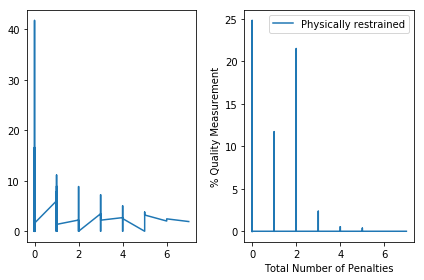

In [15]:
plt.subplot(121)
plt.plot(ca['Total Number of Penalties'], ca['Percent catheter inserted and left'], label='Catheter inserted, left')
plt.subplot(122)
plt.plot(ca['Total Number of Penalties'], ca['Percent physically restrained'], label='Physically restrained')
plt.legend(loc='best')
plt.xlabel('Total Number of Penalties')
plt.ylabel('% Quality Measurement')
plt.tight_layout()

# but this graph is messy; can't really differentiate the data, too much overlaps
# go back to this with the video, I think it explains more

In [16]:
df_quality_penalties.columns

Index(['Provider Name_x', 'Provider State_x', 'Location_x',
       'Percent catheter inserted and left',
       'Percent given pneumococcal vaccine',
       'Percent increased help daily activities',
       'Percent lost too much weight',
       'Percent low-risk residents incontinence',
       'Percent physically restrained', 'Percent received antianxiety meds',
       'Percent received antipsychotic meds',
       'Percent reported depressive symptoms', 'Percent reported severe pain',
       'Percent who fell and seriously injured', 'Percent with UTI',
       'Percent worsened independent mobility', 'Number of Fines',
       'Total Amount of Fines in Dollars', 'Number of Payment Denials',
       'Total Number of Penalties'],
      dtype='object')

In [17]:
ca = df_quality_penalties[df_quality_penalties['Provider State_x'] == 'CA']
tx = df_quality_penalties[df_quality_penalties['Provider State_x'] == 'TX']
ny = df_quality_penalties[df_quality_penalties['Provider State_x'] == 'NY']

Text(0,0.5,'% Quality Measurement')

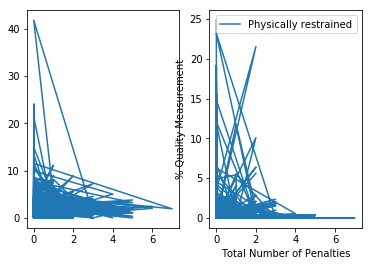

In [18]:
plt.subplot(121)
plt.plot(ca['Total Number of Penalties'], ca['Percent catheter inserted and left'], label='Catheter inserted, left')
plt.subplot(122)
plt.plot(ca['Total Number of Penalties'], ca['Percent physically restrained'], label='Physically restrained')
plt.legend(loc='best')
plt.xlabel('Total Number of Penalties')
plt.ylabel('% Quality Measurement')

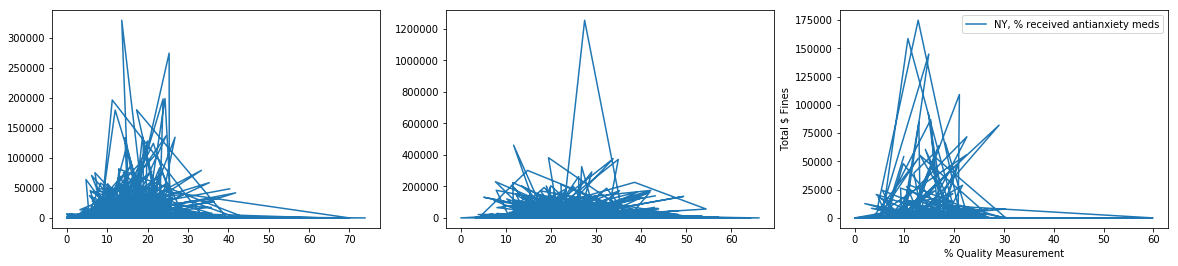

In [19]:
plt.subplot(131)
plt.plot(ca['Percent received antianxiety meds'], ca['Total Amount of Fines in Dollars'], label='CA, % received antianxiety meds') 
plt.subplot(132)
plt.plot(tx['Percent received antianxiety meds'], tx['Total Amount of Fines in Dollars'], label='TX, % received antianxiety meds') 
plt.subplot(133)
plt.plot(ny['Percent received antianxiety meds'], ny['Total Amount of Fines in Dollars'], label='NY, % received antianxiety meds')
plt.xlabel('% Quality Measurement')
plt.ylabel('Total $ Fines')
plt.legend(loc='best')
# plt.tight_layout()
plt.gcf().set_size_inches(20, 4)

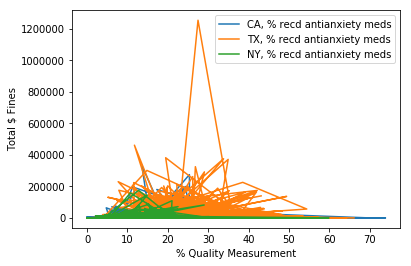

In [20]:
# subplot to grid
plt.subplot2grid((1, 3), (0, 0))
plt.plot(ca['Percent received antianxiety meds'], ca['Total Amount of Fines in Dollars'], label='CA, % recd antianxiety meds') 
plt.plot(tx['Percent received antianxiety meds'], tx['Total Amount of Fines in Dollars'], label='TX, % recd antianxiety meds') 
plt.plot(ny['Percent received antianxiety meds'], ny['Total Amount of Fines in Dollars'], label='NY, % recd antianxiety meds')
plt.xlabel('% Quality Measurement')
plt.ylabel('Total $ Fines')
plt.legend(loc='best')
plt.gcf().set_size_inches(20, 4)

In [21]:
scores = ['Percent received antianxiety meds', 'Percent catheter inserted and left', 'Percent lost too much weight']

Text(0,0.5,'score')

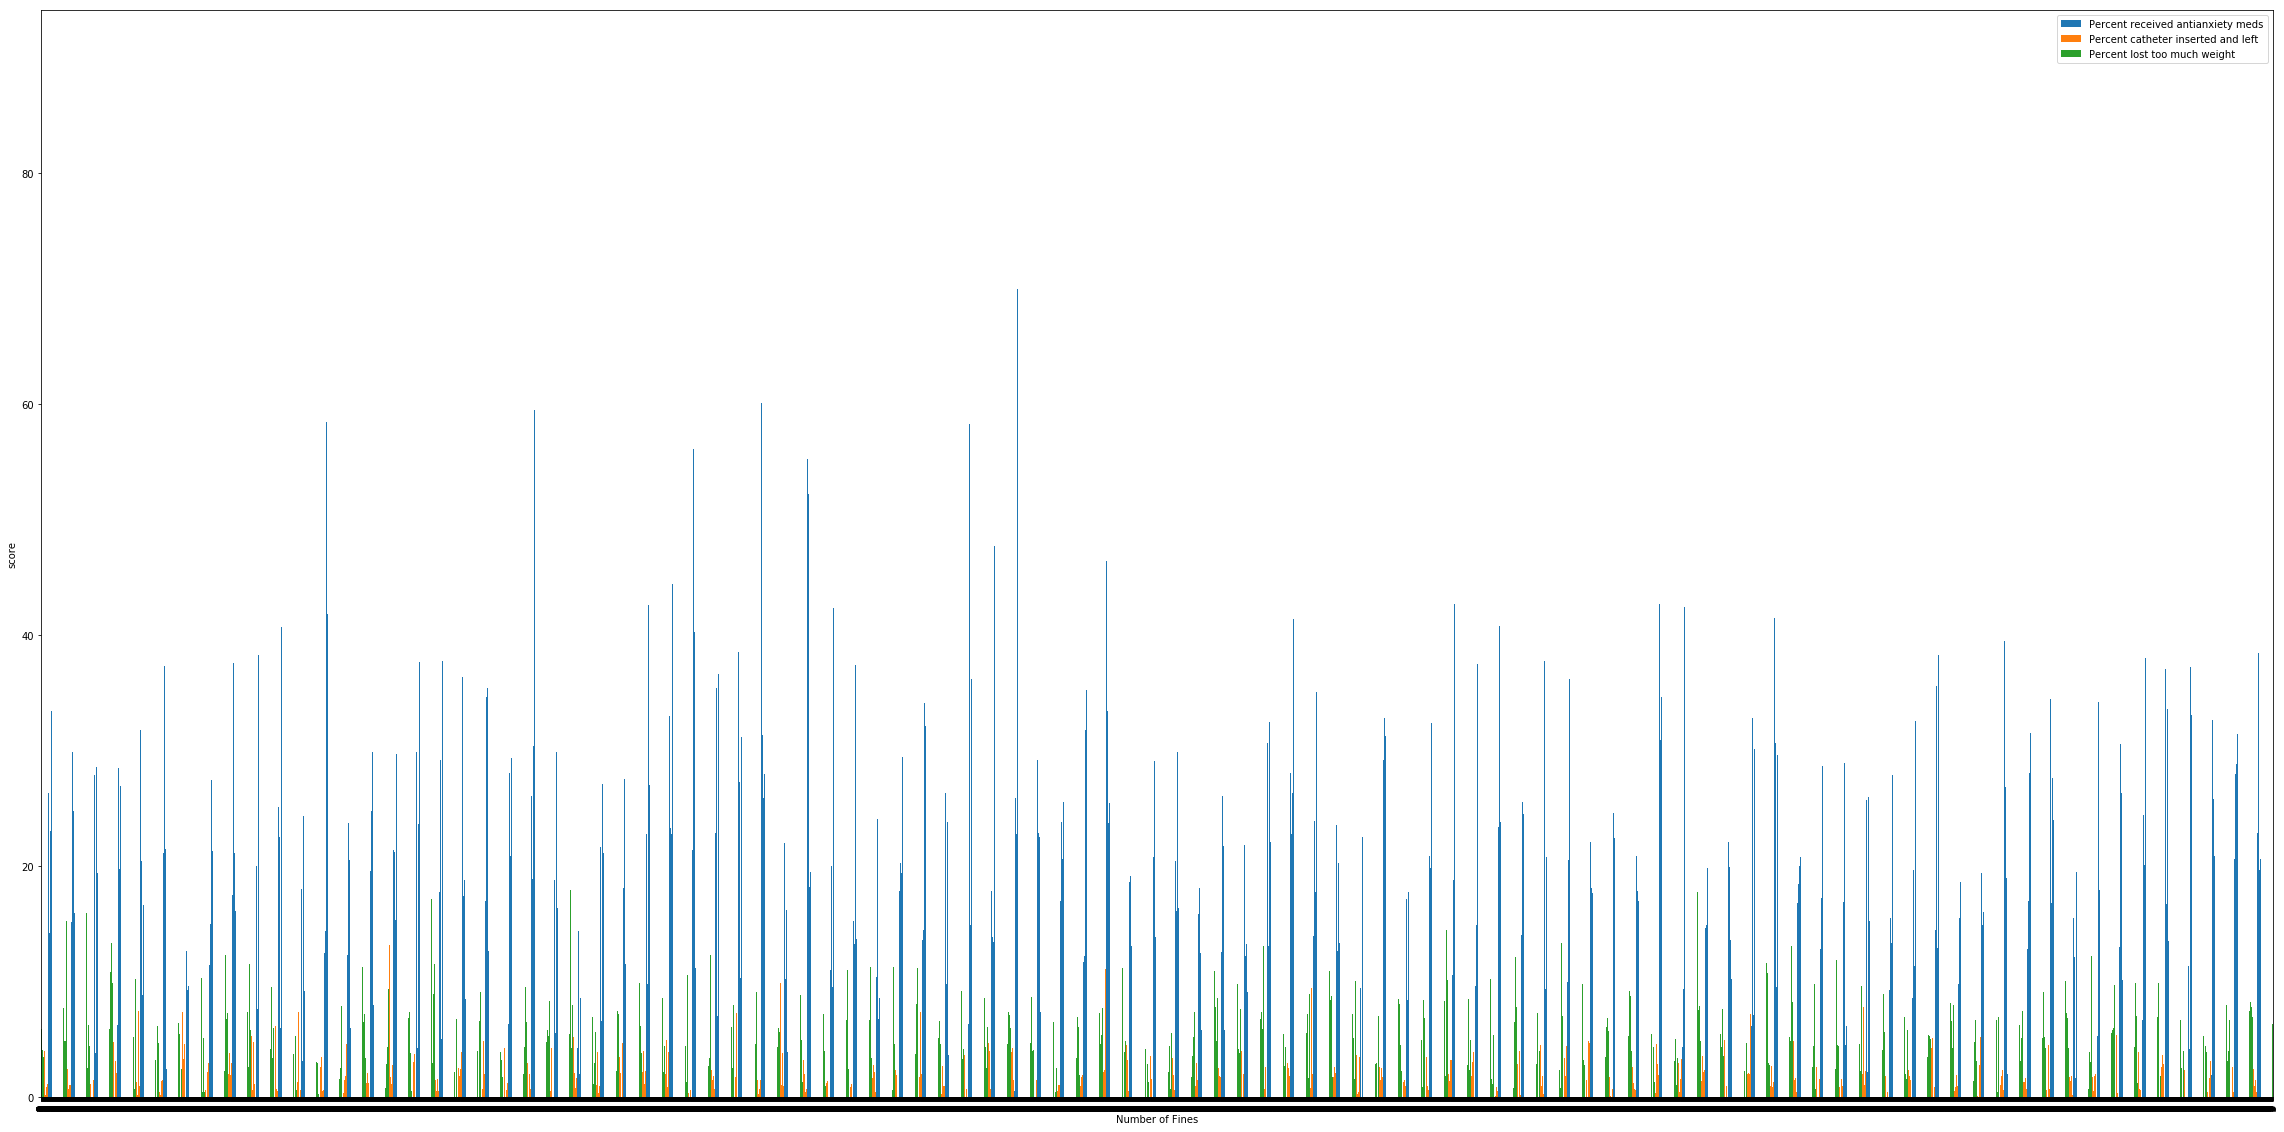

In [41]:
df_quality_penalties.plot.bar(x='Number of Fines', y=scores, figsize=(40,20))
plt.ylabel('score')
# plt.tight_layout()

In [42]:
# don't really understand what's going on...
# let's reduce dimensionality
scores = ['Percent received antianxiety meds']

Text(0,0.5,'score')

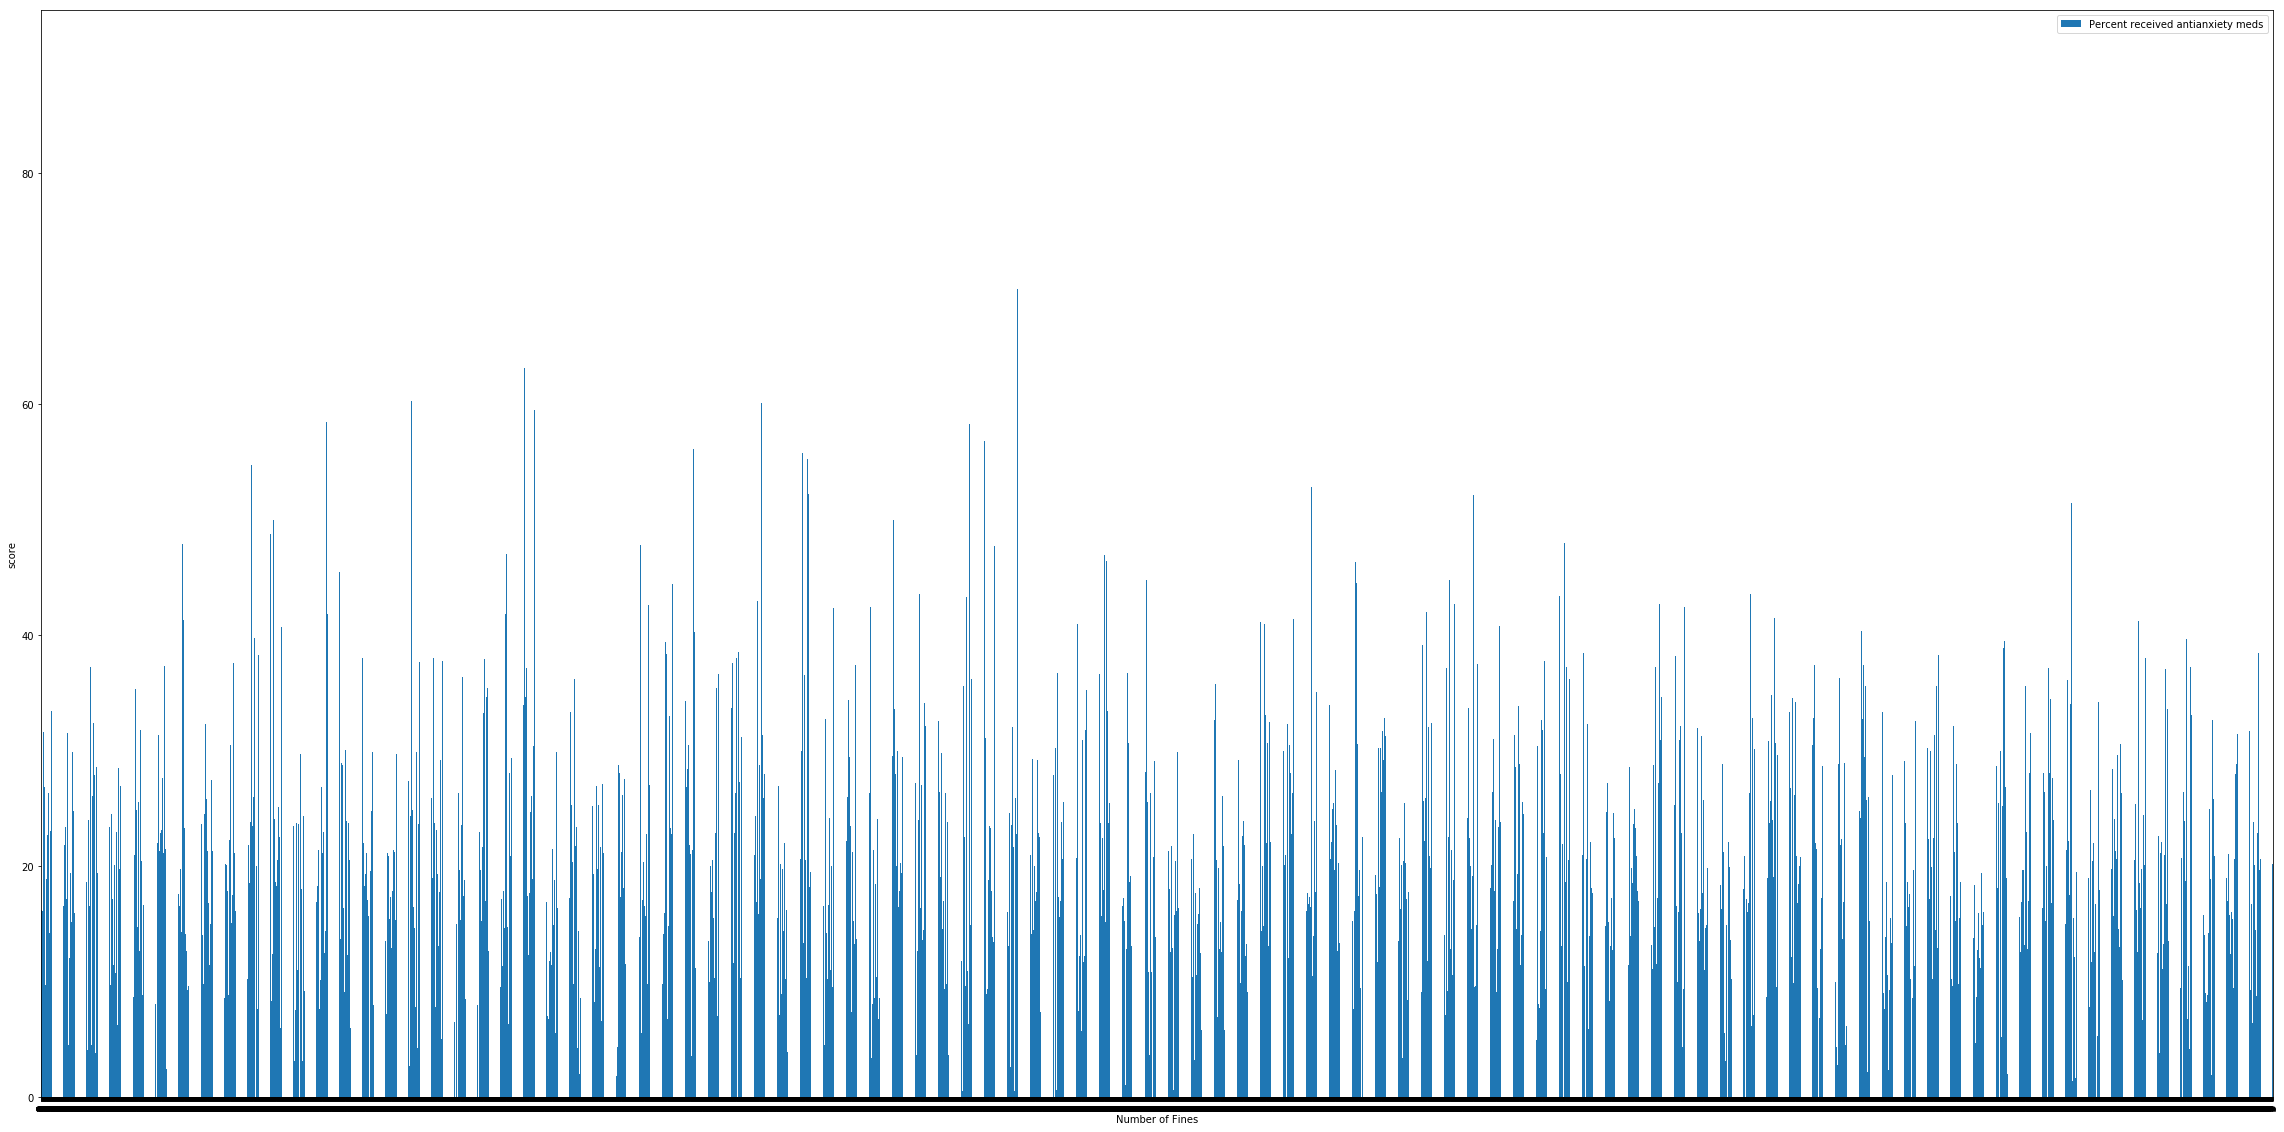

In [43]:
df_quality_penalties.plot.bar(x='Number of Fines', y=scores, figsize=(40,20))
plt.ylabel('score')

Text(0,0.5,'score')

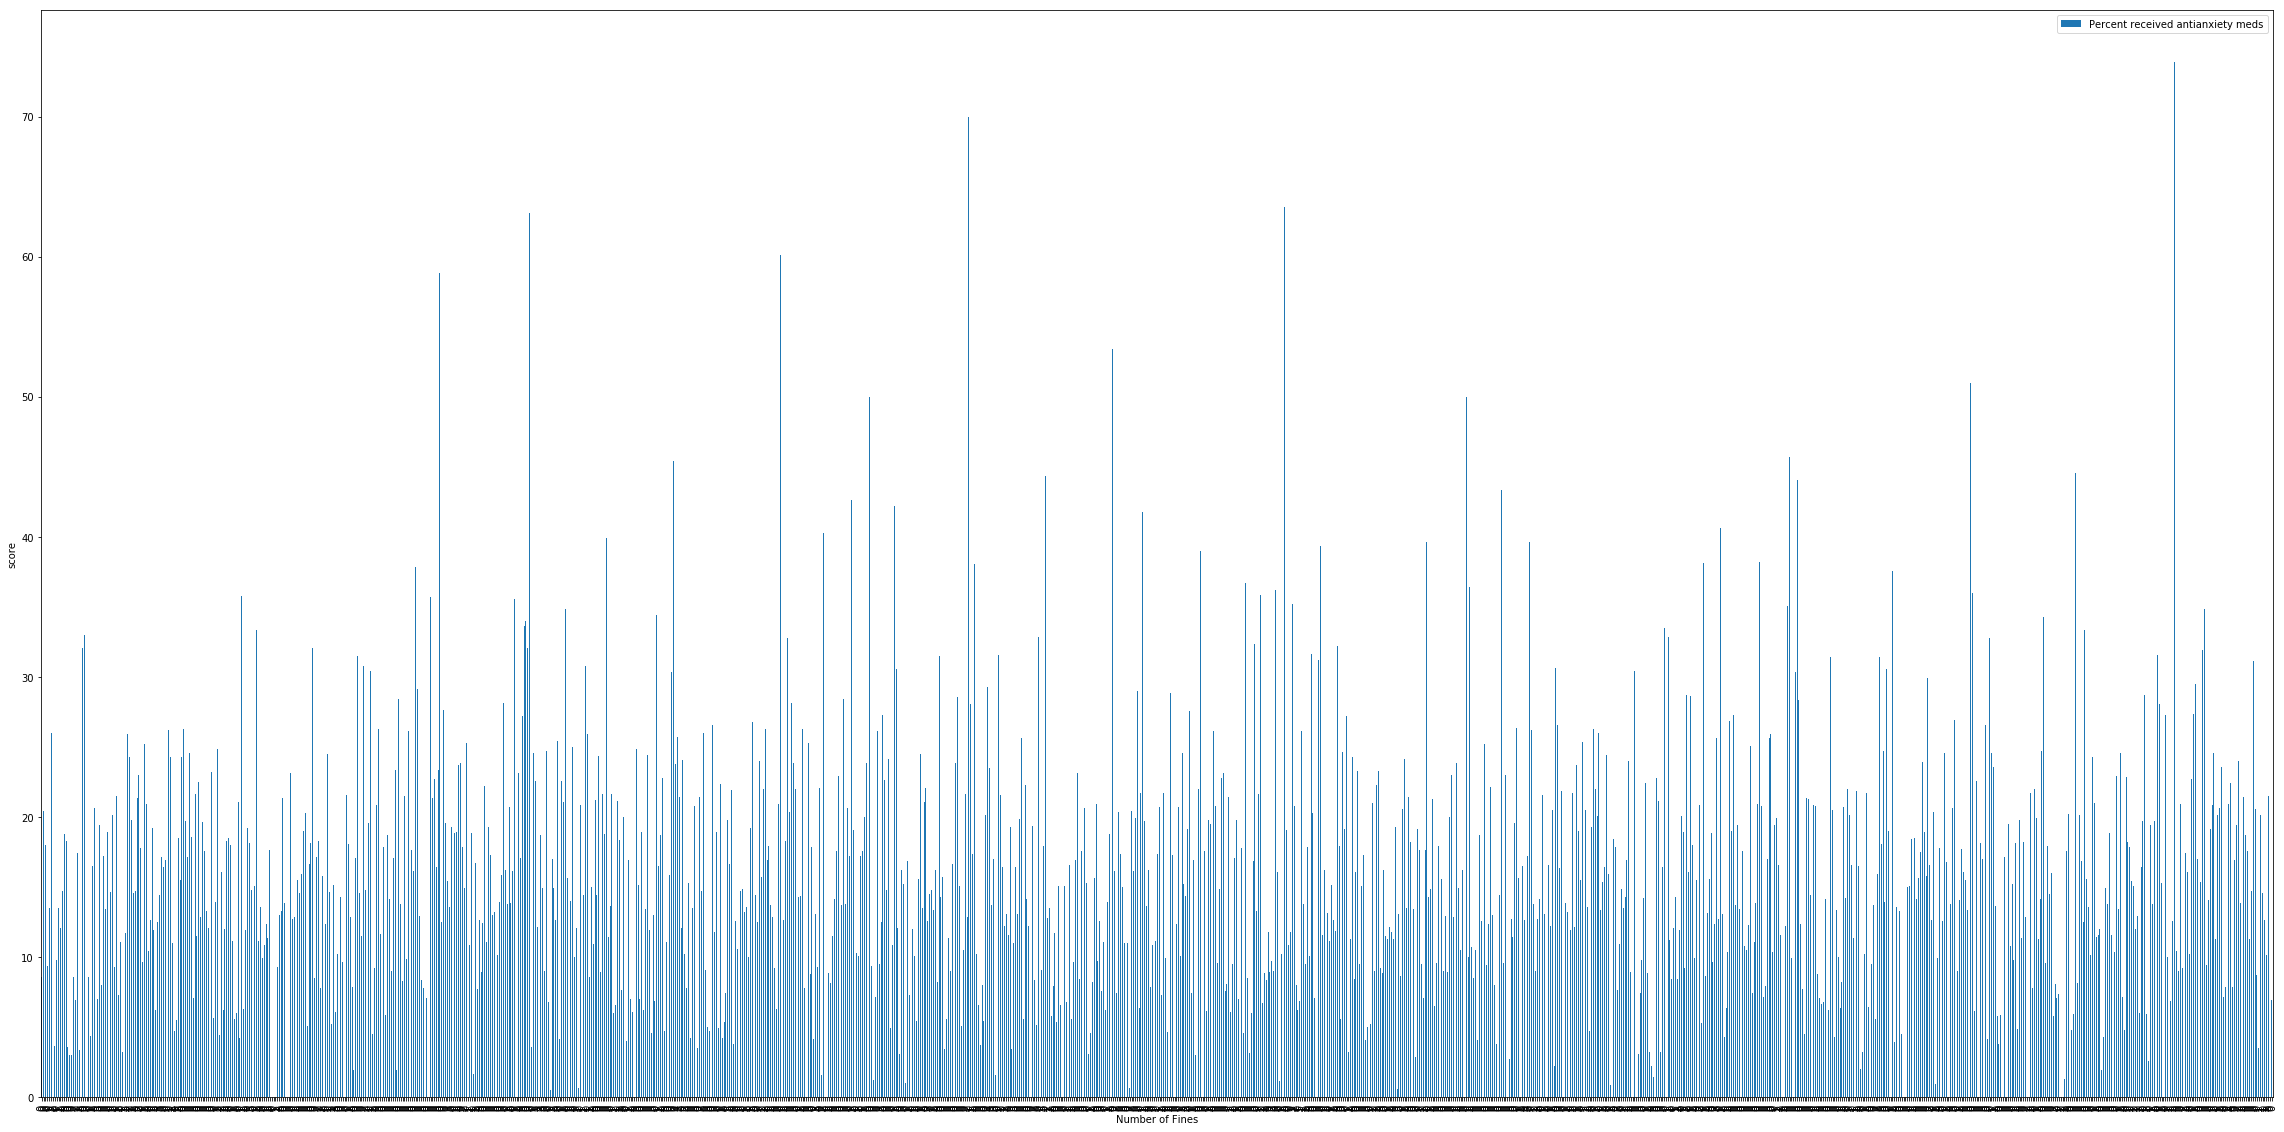

In [44]:
# still not really understanding...
# reduce further
ca.plot.bar(x='Number of Fines', y=scores, figsize=(40,20))
plt.ylabel('score')

In [79]:
# still not getting it
# reduce further
ca = df_quality_penalties[df_quality_penalties['Provider State_x'] == 'CA']

In [22]:
#filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]

ca_one_fine = ca[ca['Number of Fines'] <= 1]

In [24]:
ca_one_fine = ca_one_fine.reset_index(drop=True)

In [25]:
ca_one_fine

,Provider Name_x,Provider State_x,Location_x,Percent catheter inserted and left,Percent given pneumococcal vaccine,Percent increased help daily activities,Percent lost too much weight,Percent low-risk residents incontinence,Percent physically restrained,Percent received antianxiety meds,Percent received antipsychotic meds,Percent reported depressive symptoms,Percent reported severe pain,Percent who fell and seriously injured,Percent with UTI,Percent worsened independent mobility,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
0,A GRACE SUB ACUTE & SKILLED CARE,CA,"1250 S WINCHESTER BOULEVARD SAN JOSE, CA 95128...",6.763294,99.201598,13.397130,5.165292,22.784808,2.594810,8.606557,5.934066,0.000000,1.668085,0.000000,0.201208,8.957879,0,0,0,0
1,ABBY GARDENS HEALTHCARE CENTER,CA,"8060 FROST STREET SAN DIEGO, CA 92123 (32.8002...",0.768273,99.651568,5.309735,7.563025,44.827587,0.000000,20.416668,4.782610,0.000000,0.000000,3.484321,0.000000,14.485760,0,0,0,0
2,ACACIA PARK NURSING & REHAB CENTER,CA,"1611 SCENIC DRIVE MODESTO, CA 95355 (37.650766...",1.396179,100.000000,13.805969,3.333334,49.659864,2.380951,17.985613,4.761903,0.000000,0.687470,3.401357,3.146852,20.391525,0,0,0,0
3,ACC CARE CENTER,CA,"7801 RUSH RIVER DRIVE SACRAMENTO, CA 95831 (38...",1.131080,98.662206,7.063196,1.056339,27.333334,0.000000,9.407666,6.185569,0.000000,14.241341,0.334448,1.677854,15.721573,0,0,0,0
4,ADVANCED REHAB CENTER OF TUSTIN,CA,"2210 E FIRST STREET SANTA ANA, CA 92705 (33.74...",3.304552,99.656358,5.241936,5.426357,78.666667,0.000000,13.513514,11.347516,0.000000,1.332964,0.000000,0.344829,16.519812,0,0,0,0
5,ADVENTIST HEALTH SONORA - D/P SNF,CA,"179 SOUTH FAIRVIEW LANE SONORA, CA 95370 (37.9...",0.488565,94.552529,6.400000,6.451614,31.111113,0.000000,26.000002,11.857707,5.932202,28.452787,1.556419,4.705882,13.885417,1,39939,0,1
6,AFVW HEALTH CENTER,CA,"17040 ARNOLD DR RIVERSIDE, CA 92518 (33.872711...",4.703896,100.000000,6.818182,13.461538,NaN,0.000000,3.703705,0.000000,0.000000,2.801342,0.000000,6.557375,NaN,0,0,0,0
7,ALAMEDA CARE CENTER,CA,"925 W ALAMEDA AVE BURBANK, CA 91506 (34.163369...",0.000000,92.721520,11.231885,1.724137,42.028987,0.949368,9.830508,25.974024,0.000000,0.000000,6.012658,1.277956,11.408546,0,0,0,0
8,ALAMEDA COUNTY MEDICAL CENTER D/P SNF,CA,"15400 FOOTHILL BOULEVARD SAN LEANDRO, CA 94578...",3.006280,97.087376,9.876545,8.174388,21.276594,2.427185,13.546800,9.275362,6.561680,10.555094,0.970873,3.640779,10.770051,1,9750,0,1
9,ALAMEDA HEALTHCARE & WELLNESS CENTER,CA,"430 WILLOW STREET ALAMEDA, CA 94501 (37.758809...",1.112674,100.000000,13.123362,2.574258,35.664335,0.000000,12.085772,5.426357,0.218340,7.047951,1.142857,0.959694,21.094316,1,8217,0,1


In [32]:
ca_one_fine = ca_one_fine[['Number of Fines', 'Percent received antianxiety meds']].dropna()

In [33]:
ca_one_fine

,Number of Fines,Percent received antianxiety meds
0,0,8.606557
1,0,20.416668
2,0,17.985613
3,0,9.407666
4,0,13.513514
5,1,26.000002
6,0,3.703705
7,0,9.830508
8,1,13.546800
9,1,12.085772


Text(0,0.5,'score')

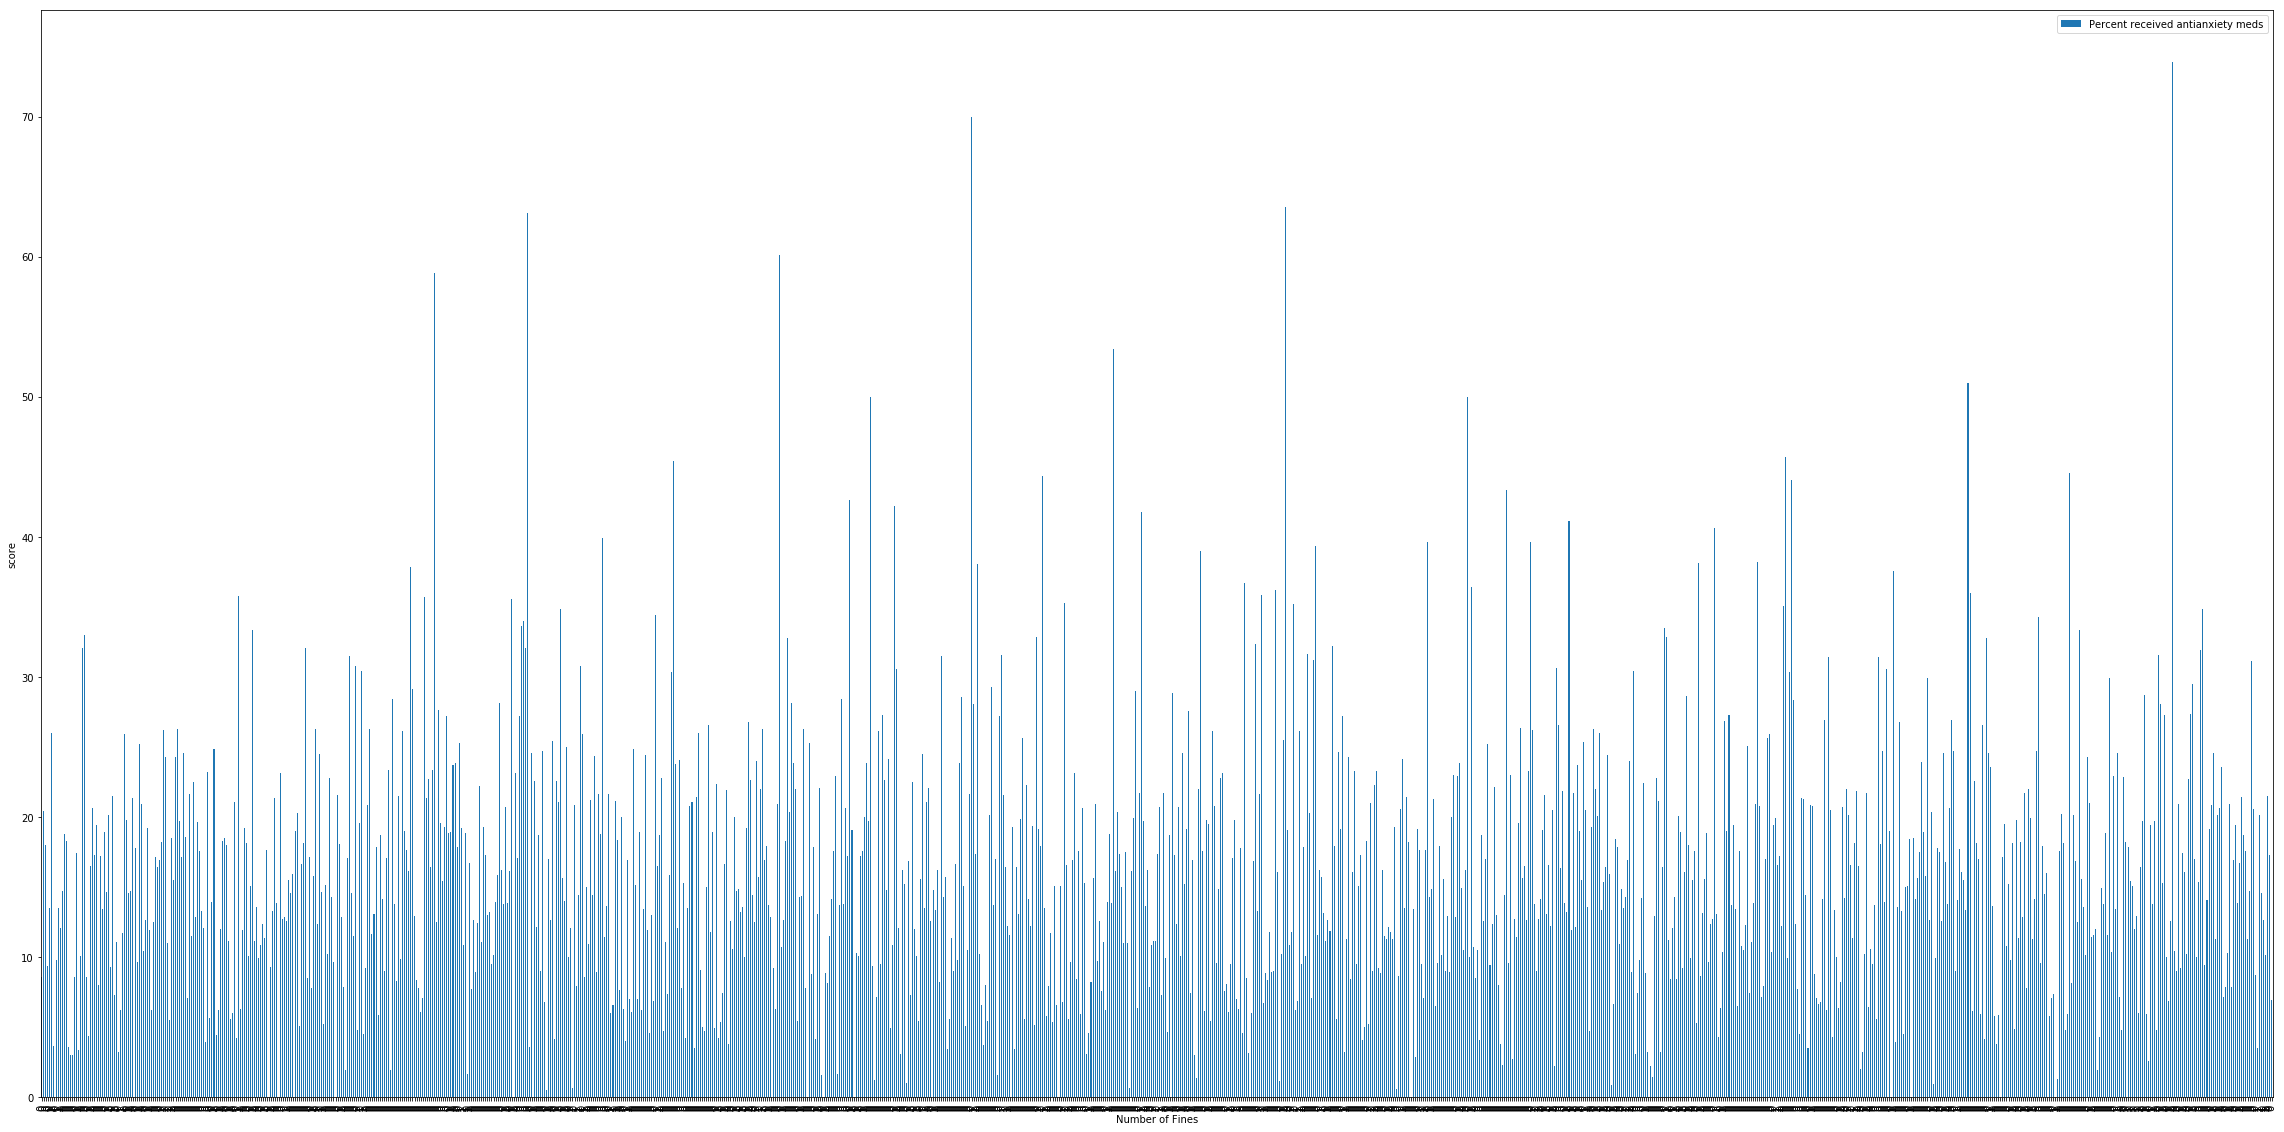

In [34]:
ca_one_fine.plot.bar(x='Number of Fines', y='Percent received antianxiety meds', figsize=(40,20))
plt.ylabel('score')

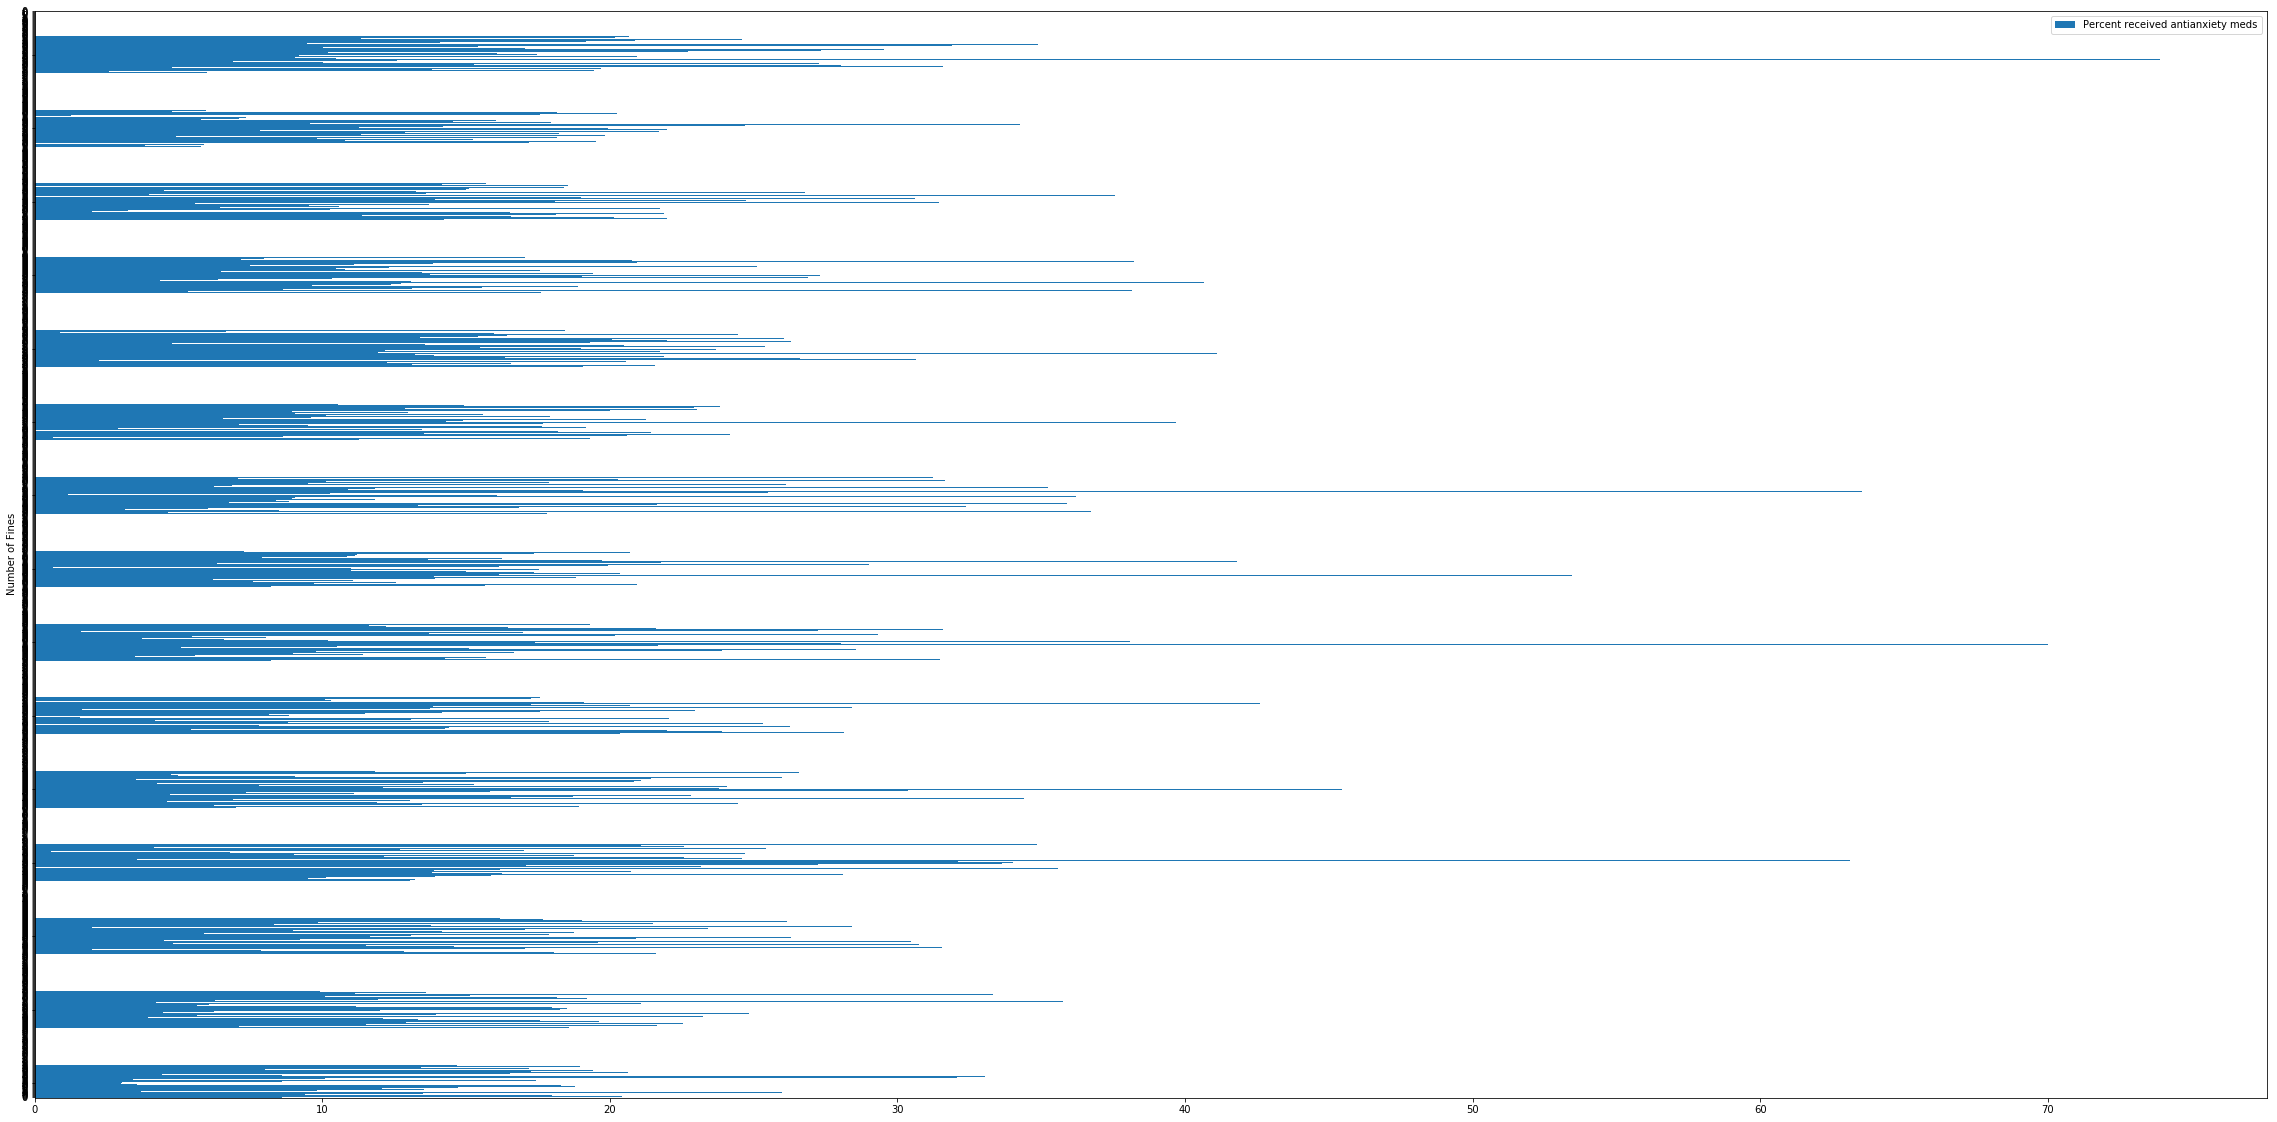

In [35]:
ca_one_fine.plot.barh(x='Number of Fines', y='Percent received antianxiety meds', figsize=(40,20))

In [36]:
df_quality_penalties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15527 entries, 125063 to 245376
Data columns (total 20 columns):
Provider Name_x                            15527 non-null object
Provider State_x                           15527 non-null object
Location_x                                 15503 non-null object
Percent catheter inserted and left         14999 non-null float64
Percent given pneumococcal vaccine         15019 non-null float64
Percent increased help daily activities    14918 non-null float64
Percent lost too much weight               14982 non-null float64
Percent low-risk residents incontinence    14608 non-null float64
Percent physically restrained              15018 non-null float64
Percent received antianxiety meds          14991 non-null float64
Percent received antipsychotic meds        14988 non-null float64
Percent reported depressive symptoms       15001 non-null float64
Percent reported severe pain               14893 non-null float64
Percent who fell and seriously inju

In [44]:
df_quality_penalties = df_quality_penalties.dropna()

In [45]:
df_quality_penalties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14533 entries, 125063 to 245376
Data columns (total 20 columns):
Provider Name_x                            14533 non-null object
Provider State_x                           14533 non-null object
Location_x                                 14533 non-null object
Percent catheter inserted and left         14533 non-null float64
Percent given pneumococcal vaccine         14533 non-null float64
Percent increased help daily activities    14533 non-null float64
Percent lost too much weight               14533 non-null float64
Percent low-risk residents incontinence    14533 non-null float64
Percent physically restrained              14533 non-null float64
Percent received antianxiety meds          14533 non-null float64
Percent received antipsychotic meds        14533 non-null float64
Percent reported depressive symptoms       14533 non-null float64
Percent reported severe pain               14533 non-null float64
Percent who fell and seriously inju

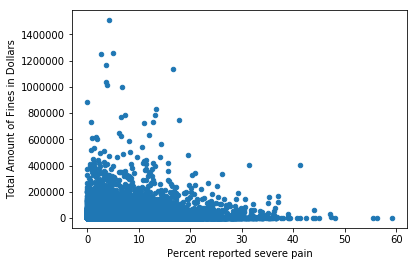

In [46]:
df_quality_penalties.plot.scatter(x='Percent reported severe pain', y='Total Amount of Fines in Dollars')
# plt.plot((0,5), (0,5), 'k--')

ValueError: x and y must be the same size

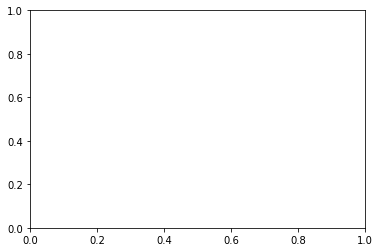

In [42]:
df_quality_penalties.plot.scatter(x=['Percent reported severe pain', 'Percent physically restrained'], 
                                  y='Total Amount of Fines in Dollars')
# can't do this because the data aren't normed the same...
# so let's try something else.

Text(0,0.5,'$ Total Fines')

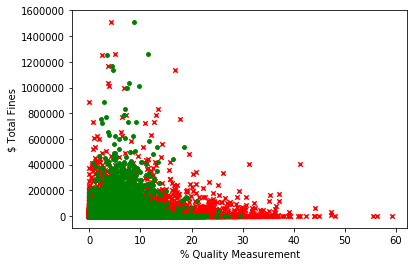

In [56]:
df_quality_penalties.plot.scatter(x='Percent reported severe pain', 
                                  y='Total Amount of Fines in Dollars', 
                                  c='r',
                                 marker='x')
df_quality_penalties.plot.scatter(x='Percent lost too much weight', 
                                  y='Total Amount of Fines in Dollars', 
                                  c='g',
                                  s=15,
                                 ax=plt.gca())
plt.xlabel('% Quality Measurement')
plt.ylabel('$ Total Fines')

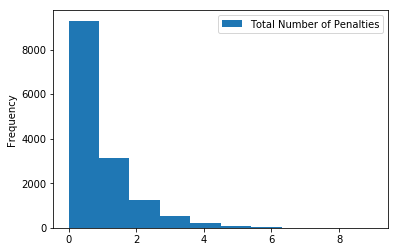

In [57]:
df_quality_penalties.plot.hist(y='Total Number of Penalties')

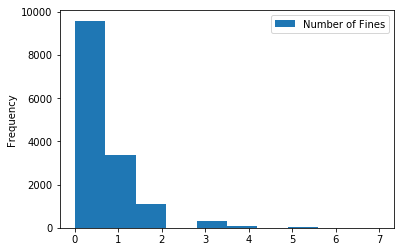

In [58]:
df_quality_penalties.plot.hist(y='Number of Fines')

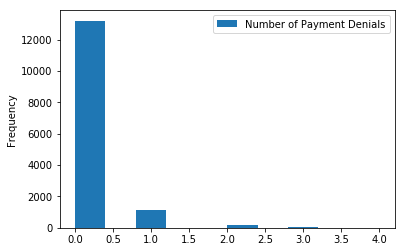

In [59]:
df_quality_penalties.plot.hist(y='Number of Payment Denials')

Text(0.5,0,'% Quality Measurement')

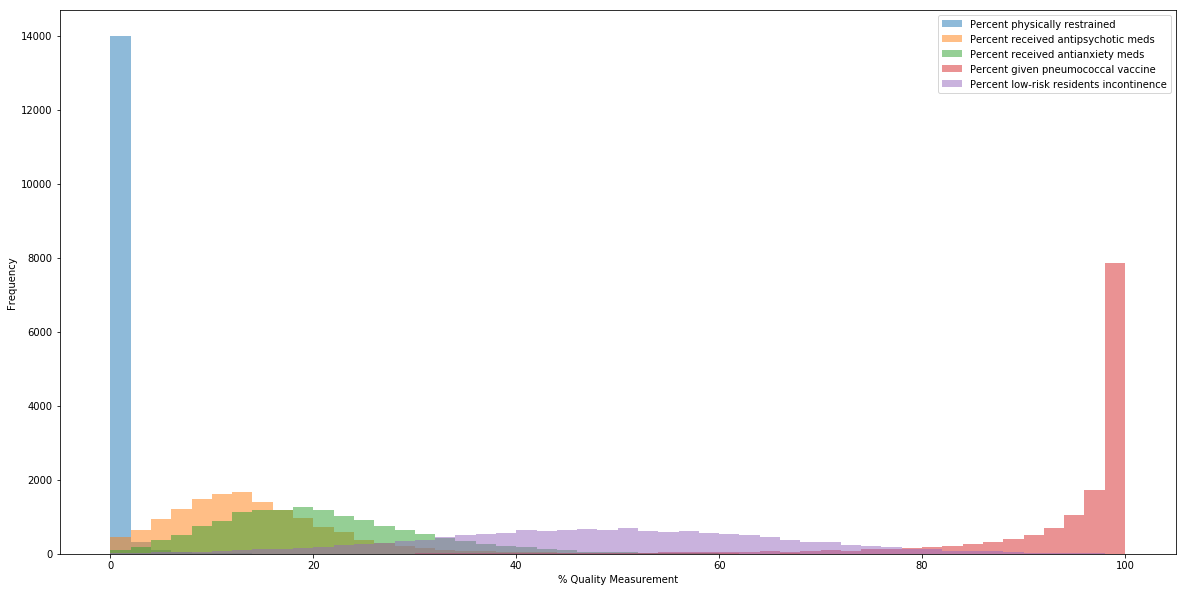

In [95]:
df_quality_penalties.plot.hist(y=['Percent physically restrained', 
                                  'Percent received antipsychotic meds',
                                  'Percent received antianxiety meds',
                                 'Percent given pneumococcal vaccine',
                                 'Percent low-risk residents incontinence'],
                               alpha=0.5,
                               bins = 50,
                              figsize=(20,10))
plt.xlabel('% Quality Measurement')

In [88]:
columns=df_quality_penalties.iloc[:,3:16]

In [89]:
columns

,Percent catheter inserted and left,Percent given pneumococcal vaccine,Percent increased help daily activities,Percent lost too much weight,Percent low-risk residents incontinence,Percent physically restrained,Percent received antianxiety meds,Percent received antipsychotic meds,Percent reported depressive symptoms,Percent reported severe pain,Percent who fell and seriously injured,Percent with UTI,Percent worsened independent mobility
Federal Provider Number,,,,,,,,,,,,,
125063,0.913644,100.000000,17.829460,2.985073,59.999998,0.000000,0.000000,8.053695,5.479451,4.506574,4.026847,1.351351,20.282688
75442,0.441907,99.692307,7.911391,2.215188,13.567842,0.000000,43.478262,41.711229,3.333331,6.306453,0.923079,3.134796,7.786566
56376,6.763294,99.201598,13.397130,5.165292,22.784808,2.594810,8.606557,5.934066,0.000000,1.668085,0.000000,0.201208,8.957879
335023,0.308351,99.943758,5.321354,3.344671,33.207545,0.056243,5.905512,6.722689,2.531644,0.000000,1.293589,1.750423,4.693770
146085,0.000000,98.623856,15.060243,5.882350,23.728815,0.917432,16.184971,5.339806,0.000000,0.801631,2.752292,2.803735,17.738821
115002,0.784689,98.200514,10.967744,5.438069,75.460121,0.257069,7.598786,8.000000,15.384617,5.986839,0.514140,2.570693,12.627378
115521,4.799205,100.000000,11.111111,3.409093,79.617837,0.000000,21.751413,15.873019,11.232877,1.279296,1.794873,0.259067,15.130368
115275,1.160228,100.000000,6.958764,7.191010,64.210525,0.000000,10.044642,0.224215,0.476192,4.613149,0.871461,4.824559,10.310731
75410,0.000000,98.170735,13.013700,2.758620,67.532468,0.000000,20.547945,31.250000,0.000000,0.000000,3.048781,0.613496,15.947643


Text(0.5,0,'% Quality Measurement')

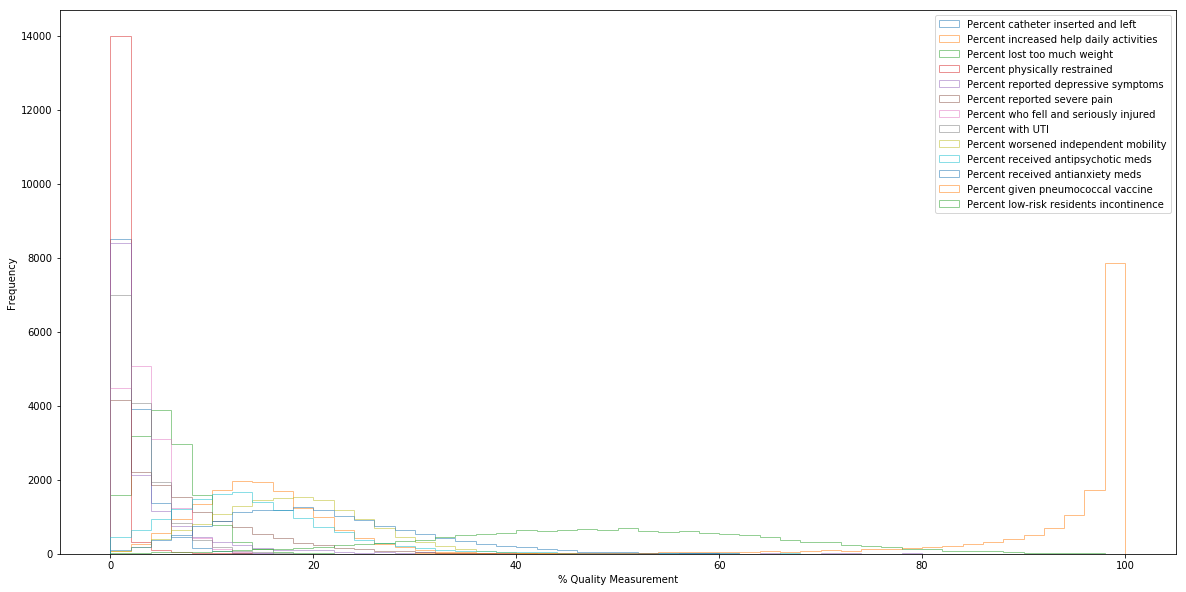

In [103]:
df_quality_penalties.plot.hist(y=['Percent catheter inserted and left', 
                                  'Percent increased help daily activities',
                                  'Percent lost too much weight',
                                  'Percent physically restrained',
                                  'Percent reported depressive symptoms',
                                  'Percent reported severe pain',
                                  'Percent who fell and seriously injured',
                                  'Percent with UTI',
                                  'Percent worsened independent mobility',
                                  'Percent received antipsychotic meds',
                                  'Percent received antianxiety meds',
                                 'Percent given pneumococcal vaccine',
                                 'Percent low-risk residents incontinence'],
                               histtype='step',
                               alpha=0.5,
                               bins = 50,
                              figsize=(20,10))
plt.xlabel('% Quality Measurement')

# this visualizes everything but it's so dense that it's hard to read. We can see that some metrics are very low, and others
# are otherwise concentrated in the low end regardless

In [104]:
# let's try some boxplots
quality_measures = ['Percent catheter inserted and left', 
                                  'Percent increased help daily activities',
                                  'Percent lost too much weight',
                                  'Percent physically restrained',
                                  'Percent reported depressive symptoms',
                                  'Percent reported severe pain',
                                  'Percent who fell and seriously injured',
                                  'Percent with UTI',
                                  'Percent worsened independent mobility',
                                  'Percent received antipsychotic meds',
                                  'Percent received antianxiety meds',
                                 'Percent given pneumococcal vaccine',
                                 'Percent low-risk residents incontinence']

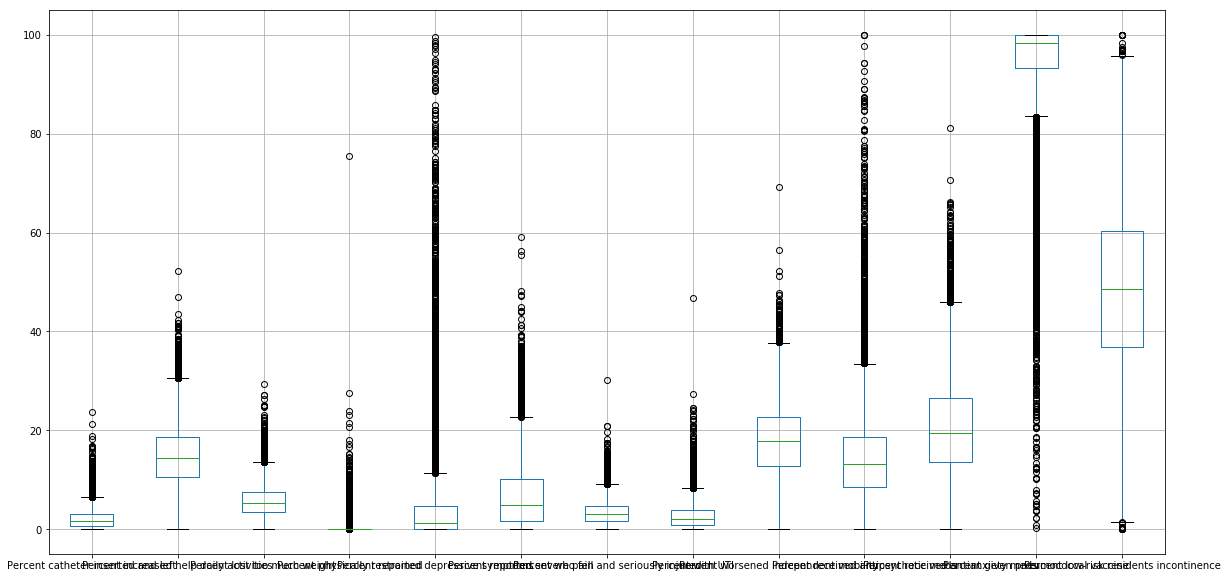

In [106]:
df_quality_penalties.boxplot(column=quality_measures, figsize=(20,10))

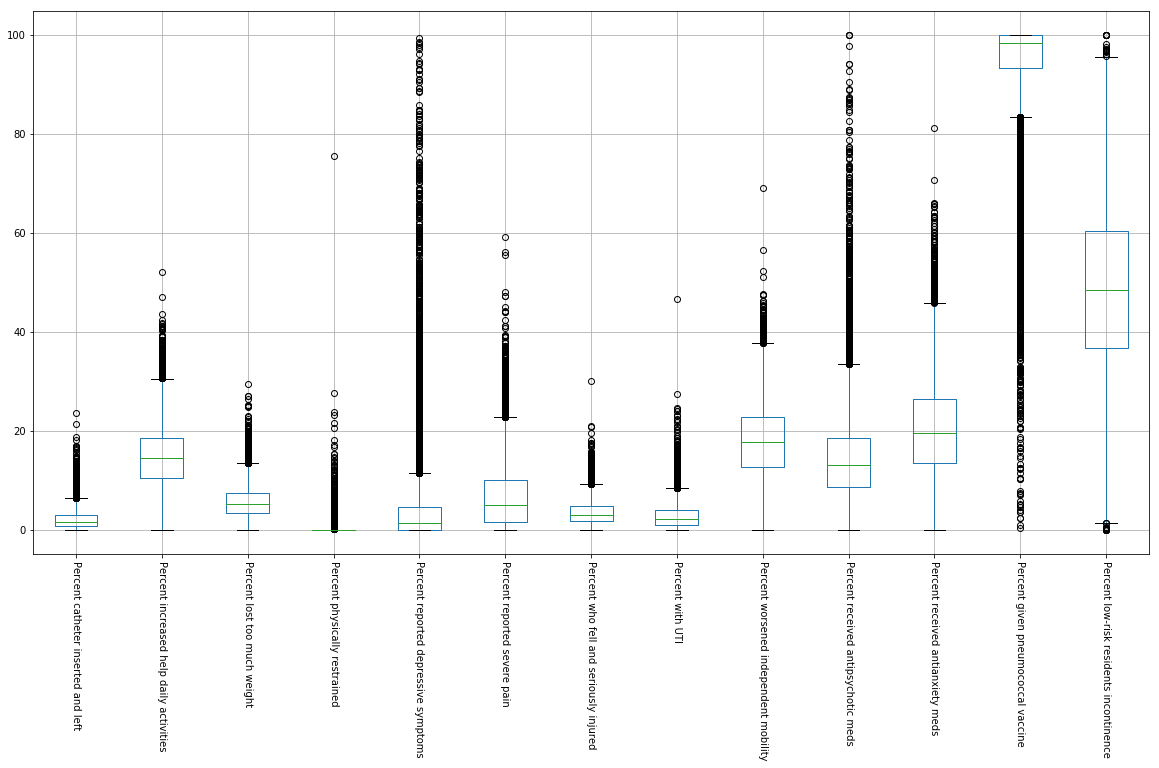

In [109]:
# but geez those labels are all bunched up. Awful. Gotta fix
df_quality_penalties.boxplot(column=quality_measures, figsize=(20,10), rot=-90)

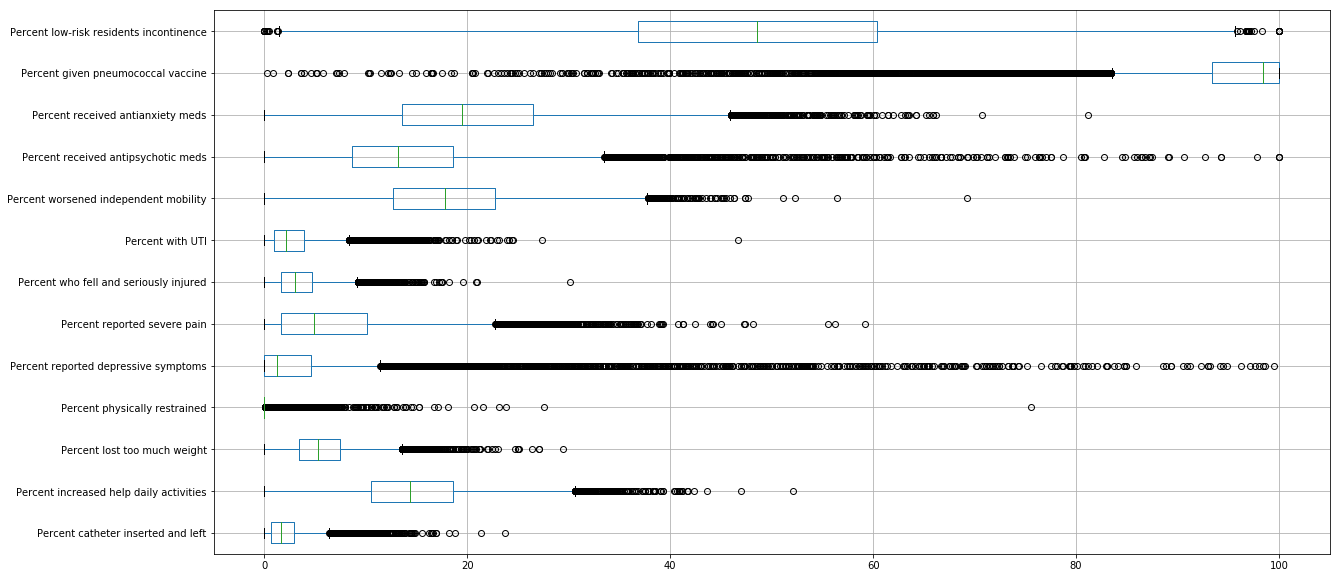

In [110]:
# but let's just make it horizontal
df_quality_penalties.boxplot(column=quality_measures, figsize=(20,10), vert=False)

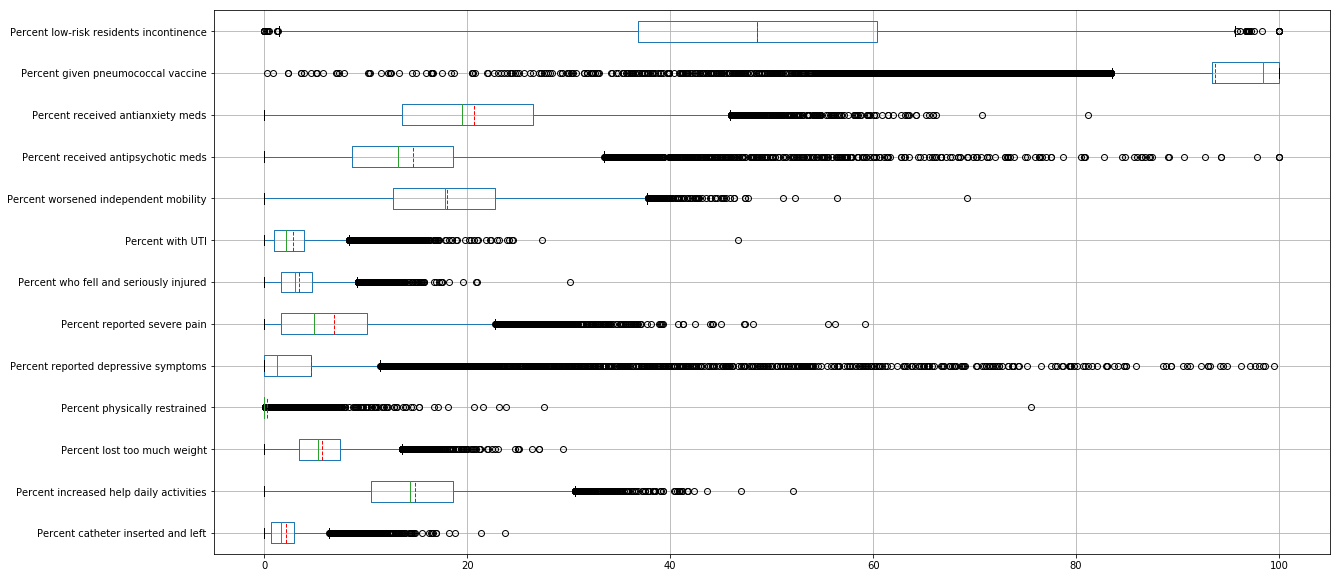

In [114]:
# wow, so many outliers. Need more metrics
mp=dict(color='r')
df_quality_penalties.boxplot(column=quality_measures, 
                             figsize=(20,10), 
                             vert=False, 
                             showmeans=True, 
                             meanline=True,
                            meanprops=mp)


In [115]:
df_quality_penalties['Location_x']

Federal Provider Number
125063    15 CRAIGSIDE PLACE HONOLULU, HI 96817 (21.3231...
75442     60 WEST STREET ROCKY HILL, CT 06067 (41.65413,...
56376     1250 S WINCHESTER BOULEVARD SAN JOSE, CA 95128...
335023    875 JERUSALEM AVENUE UNIONDALE, NY 11553 (40.6...
146085    1190 E 2900 NORTH ROAD CLIFTON, IL 60927 (40.9...
115002    1819 CLIFTON ROAD ATLANTA, GA 30329 (33.802302...
115521                    900 WYLIE ROAD MARIETTA, GA 30067
115275                       350 BOULVARD ATLANTA, GA 30312
75410     3 SOUTH WIG HILL RD CHESTER, CT 06412 (41.4006...
335532    100 ST CAMILLUS WAY FAIRPORT, NY 14450 (43.127...
165178                   FOUR OHIO STREET DECORAH, IA 52101
425057    83 THOMSON CIRCLE ABBEVILLE, SC 29620 (34.1592...
105335    2105 SW 11TH COURT DELRAY BEACH, FL 33445 (26....
105411    1717 HOMEWOOD BLVD DELRAY BEACH, FL 33445 (26....
105749    7101 DR MARTIN LUTHER KING JR ST N SAINT PETER...
265839    206 NORTH MAIN STREET O FALLON, MO 63366 (38.8...
265657    5026 F